In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

In [2]:
df=pd.read_csv("C:\\Users\\ASUS\\Desktop\\Sem 4\\DAB-402 Capstone Project\\final_tripdata.csv\\tripdata.csv")
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_week_start,duration,distance
0,000001004784CD35,docked_bike,22-07-2020 15:38,22-07-2020 15:56,Wolcott (Ravenswood) Ave & Montrose Ave,238,Southport Ave & Clybourn Ave,307,41.961406,-87.676169,41.920771,-87.663712,casual,4,1824,42501.53
1,000002EBE159AE82,electric_bike,22-06-2021 17:25,22-06-2021 17:31,Clinton St & Jackson Blvd,638,Milwaukee Ave & Grand Ave,13033,41.878261,-87.641155,41.891495,-87.648179,member,3,-619,14982.48
2,00000550C665101A,docked_bike,06-06-2020 15:20,06-06-2020 16:28,Sheffield Ave & Waveland Ave,114,Kedzie Ave & Milwaukee Ave,260,41.949399,-87.654529,41.929567,-87.707857,casual,7,10808,56896.25
3,0000127970C84F62,docked_bike,30-05-2020 06:36,30-05-2020 06:55,Green St & Madison St,198,Wells St & Concord Ln,289,41.881900,-87.648800,41.912100,-87.634700,member,7,1892,33329.42
4,00001A81D056B01B,classic_bike,14-04-2021 08:10,14-04-2021 08:19,Wood St & Hubbard St,13432,Morgan St & Lake St,TA1306000015,41.889899,-87.671473,41.885483,-87.652305,member,4,903,19670.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,30AED5341DE67567,electric_bike,22-08-2020 20:23,22-08-2020 20:59,State St & Kinzie St,47,NaN,NaN,41.889433,-87.627602,41.860000,-87.610000,member,7,3566,34294.69
1048571,30AEDC26BD2743AE,docked_bike,06-08-2020 16:26,06-08-2020 16:37,Loomis St & Jackson Blvd,146,Ashland Ave & Chicago Ave,350,41.877945,-87.662007,41.895966,-87.667747,member,5,1056,18913.07
1048572,30AEDF8E17737460,docked_bike,09-05-2020 07:55,09-05-2020 08:22,Lake Shore Dr & Wellington Ave,157,Lake Shore Dr & Wellington Ave,157,41.936700,-87.636800,41.936700,-87.636800,member,7,6742,0.00
1048573,30AEE3AAB01939A4,classic_bike,03-03-2021 09:53,03-03-2021 12:35,Daley Center Plaza,TA1306000010,St. Clair St & Erie St,13016,41.884241,-87.629634,41.894345,-87.622798,casual,4,28161,12199.12


# Data Cleaning

The stage is to clean the data and make it availble for analyses to get our recommendations at the act stages.

In [3]:
count = (df['duration'] <=0).sum()
count


2090

In [4]:
count_dis = (df['distance'] <=0).sum()
count_dis

81554

In [5]:
#In the duration column the are values that are negative. Duration can never be negative
df.drop(df.index[df['duration'] <= 0],inplace =True)

In [6]:
count = (df['duration'] <=0).sum()

In [7]:
count

0

In [8]:
#In the Distance column the are values that are negative. Distance can never be negative
df.drop(df.index[df['distance'] <= 0],inplace =True)

In [9]:
count_dis = (df['distance'] <=0).sum()
count_dis

0

In [10]:
count_Nan = df.isna().sum()
count_Nan
 

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    46076
start_station_id      46162
end_station_name      51250
end_station_id        51324
start_lat                 0
start_lng                 0
end_lat                   0
end_lng                   0
member_casual             0
day_week_start            0
duration                  0
distance                  0
dtype: int64

In [11]:
count_TNan = df.isna().sum().sum()
count_TNan


194812

In [12]:
df=df.dropna()
df
# Here, we drop all Nan values and it is best to remove unnecessary or remove incomplete data.

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_week_start,duration,distance
0,000001004784CD35,docked_bike,22-07-2020 15:38,22-07-2020 15:56,Wolcott (Ravenswood) Ave & Montrose Ave,238,Southport Ave & Clybourn Ave,307,41.961406,-87.676169,41.920771,-87.663712,casual,4,1824,42501.53
2,00000550C665101A,docked_bike,06-06-2020 15:20,06-06-2020 16:28,Sheffield Ave & Waveland Ave,114,Kedzie Ave & Milwaukee Ave,260,41.949399,-87.654529,41.929567,-87.707857,casual,7,10808,56896.25
3,0000127970C84F62,docked_bike,30-05-2020 06:36,30-05-2020 06:55,Green St & Madison St,198,Wells St & Concord Ln,289,41.881900,-87.648800,41.912100,-87.634700,member,7,1892,33329.42
4,00001A81D056B01B,classic_bike,14-04-2021 08:10,14-04-2021 08:19,Wood St & Hubbard St,13432,Morgan St & Lake St,TA1306000015,41.889899,-87.671473,41.885483,-87.652305,member,4,903,19670.18
5,00001DCF2BC423F4,docked_bike,13-06-2021 12:00,13-06-2021 12:29,Millennium Park,13008,Fort Dearborn Dr & 31st St,TA1307000048,41.881032,-87.624084,41.838556,-87.608218,casual,1,2902,45342.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048567,30AEC22B3883E7D8,docked_bike,08-02-2020 12:09,08-02-2020 12:19,Broadway & Wilson Ave,293,Clark St & Grace St,165,41.965200,-87.658100,41.950800,-87.659200,member,7,957,14441.95
1048569,30AEC890D6A33761,docked_bike,15-07-2020 15:35,15-07-2020 15:43,Halsted St & Dickens Ave,225,Wilton Ave & Diversey Pkwy,13,41.919936,-87.648830,41.932418,-87.652705,casual,4,815,13069.66
1048571,30AEDC26BD2743AE,docked_bike,06-08-2020 16:26,06-08-2020 16:37,Loomis St & Jackson Blvd,146,Ashland Ave & Chicago Ave,350,41.877945,-87.662007,41.895966,-87.667747,member,5,1056,18913.07
1048573,30AEE3AAB01939A4,classic_bike,03-03-2021 09:53,03-03-2021 12:35,Daley Center Plaza,TA1306000010,St. Clair St & Erie St,13016,41.884241,-87.629634,41.894345,-87.622798,casual,4,28161,12199.12


In [13]:
#Change the day number to the weekdays name for easy understanding.
df['day_week_start'].replace({1.0:'Sunday',2.0:'Monday',3.0:'Tuesday',4.0:'Wednesday',5.0:'Thursday',6.0:'Friday',7.0:'Saturday'},inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [14]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_week_start,duration,distance
0,000001004784CD35,docked_bike,22-07-2020 15:38,22-07-2020 15:56,Wolcott (Ravenswood) Ave & Montrose Ave,238,Southport Ave & Clybourn Ave,307,41.961406,-87.676169,41.920771,-87.663712,casual,Wednesday,1824,42501.53
2,00000550C665101A,docked_bike,06-06-2020 15:20,06-06-2020 16:28,Sheffield Ave & Waveland Ave,114,Kedzie Ave & Milwaukee Ave,260,41.949399,-87.654529,41.929567,-87.707857,casual,Saturday,10808,56896.25
3,0000127970C84F62,docked_bike,30-05-2020 06:36,30-05-2020 06:55,Green St & Madison St,198,Wells St & Concord Ln,289,41.881900,-87.648800,41.912100,-87.634700,member,Saturday,1892,33329.42
4,00001A81D056B01B,classic_bike,14-04-2021 08:10,14-04-2021 08:19,Wood St & Hubbard St,13432,Morgan St & Lake St,TA1306000015,41.889899,-87.671473,41.885483,-87.652305,member,Wednesday,903,19670.18
5,00001DCF2BC423F4,docked_bike,13-06-2021 12:00,13-06-2021 12:29,Millennium Park,13008,Fort Dearborn Dr & 31st St,TA1307000048,41.881032,-87.624084,41.838556,-87.608218,casual,Sunday,2902,45342.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048567,30AEC22B3883E7D8,docked_bike,08-02-2020 12:09,08-02-2020 12:19,Broadway & Wilson Ave,293,Clark St & Grace St,165,41.965200,-87.658100,41.950800,-87.659200,member,Saturday,957,14441.95
1048569,30AEC890D6A33761,docked_bike,15-07-2020 15:35,15-07-2020 15:43,Halsted St & Dickens Ave,225,Wilton Ave & Diversey Pkwy,13,41.919936,-87.648830,41.932418,-87.652705,casual,Wednesday,815,13069.66
1048571,30AEDC26BD2743AE,docked_bike,06-08-2020 16:26,06-08-2020 16:37,Loomis St & Jackson Blvd,146,Ashland Ave & Chicago Ave,350,41.877945,-87.662007,41.895966,-87.667747,member,Thursday,1056,18913.07
1048573,30AEE3AAB01939A4,classic_bike,03-03-2021 09:53,03-03-2021 12:35,Daley Center Plaza,TA1306000010,St. Clair St & Erie St,13016,41.884241,-87.629634,41.894345,-87.622798,casual,Wednesday,28161,12199.12


In [15]:
# Remove the langitude and longitude value because we have already distance column
newdf = df.drop(['start_lat','start_lng','end_lat','end_lng'],axis = 1)
newdf_causal = df.drop(['start_lat','start_lng','end_lat','end_lng'],axis = 1)
df = df.drop(['start_lat','start_lng','end_lat','end_lng'],axis = 1)

In [16]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,day_week_start,duration,distance
0,000001004784CD35,docked_bike,22-07-2020 15:38,22-07-2020 15:56,Wolcott (Ravenswood) Ave & Montrose Ave,238,Southport Ave & Clybourn Ave,307,casual,Wednesday,1824,42501.53
2,00000550C665101A,docked_bike,06-06-2020 15:20,06-06-2020 16:28,Sheffield Ave & Waveland Ave,114,Kedzie Ave & Milwaukee Ave,260,casual,Saturday,10808,56896.25
3,0000127970C84F62,docked_bike,30-05-2020 06:36,30-05-2020 06:55,Green St & Madison St,198,Wells St & Concord Ln,289,member,Saturday,1892,33329.42
4,00001A81D056B01B,classic_bike,14-04-2021 08:10,14-04-2021 08:19,Wood St & Hubbard St,13432,Morgan St & Lake St,TA1306000015,member,Wednesday,903,19670.18
5,00001DCF2BC423F4,docked_bike,13-06-2021 12:00,13-06-2021 12:29,Millennium Park,13008,Fort Dearborn Dr & 31st St,TA1307000048,casual,Sunday,2902,45342.48
...,...,...,...,...,...,...,...,...,...,...,...,...
1048567,30AEC22B3883E7D8,docked_bike,08-02-2020 12:09,08-02-2020 12:19,Broadway & Wilson Ave,293,Clark St & Grace St,165,member,Saturday,957,14441.95
1048569,30AEC890D6A33761,docked_bike,15-07-2020 15:35,15-07-2020 15:43,Halsted St & Dickens Ave,225,Wilton Ave & Diversey Pkwy,13,casual,Wednesday,815,13069.66
1048571,30AEDC26BD2743AE,docked_bike,06-08-2020 16:26,06-08-2020 16:37,Loomis St & Jackson Blvd,146,Ashland Ave & Chicago Ave,350,member,Thursday,1056,18913.07
1048573,30AEE3AAB01939A4,classic_bike,03-03-2021 09:53,03-03-2021 12:35,Daley Center Plaza,TA1306000010,St. Clair St & Erie St,13016,casual,Wednesday,28161,12199.12


In [17]:
newdff = newdf.dropna()

In [18]:
newdf_causall = newdf_causal.dropna()

In [19]:
dff = df.dropna()

# Analysing Data

In [20]:
newdf.describe() #Description of Duration and Distance Variable

,duration,distance
count,8.912540e+05,891254.000000
mean,4.715277e+04,23671.300222
std,1.334435e+07,18712.910508
min,1.000000e+00,0.010000
25%,8.020000e+02,10746.630000
50%,1.585000e+03,18442.400000
75%,5.118000e+03,31429.450000
max,8.875942e+09,304295.320000


In [21]:
newdff['member_casual'].value_counts() 
#There are 555275 members
#There are 335979 casual riders

member    555275
casual    335979
Name: member_casual, dtype: int64

In [22]:
newdff['start_station_name'].value_counts()  
#Streeter Dr & Grand Ave is the most visited station Annual members and casual rides use.

Streeter Dr & Grand Ave       10194
Clark St & Elm St              8286
Lake Shore Dr & North Blvd     7263
Lake Shore Dr & Monroe St      7229
Wells St & Concord Ln          7189
                              ...  
Loomis St & 89th St               2
Hampden Ct & Diversey Ave         2
Jeffery Blvd & 91st St            2
Yates Blvd & 93rd St              2
Ashland Ave & 73rd St             1
Name: start_station_name, Length: 709, dtype: int64

In [23]:
newdff['end_station_name'].value_counts()
#Streeter Dr & Grand Ave 3336 is the most visited station Annual members and casual rides use.

Streeter Dr & Grand Ave                             10709
Clark St & Elm St                                    8333
Lake Shore Dr & North Blvd                           7701
Theater on the Lake                                  7555
Wells St & Concord Ln                                7472
                                                    ...  
Ashland Ave & 73rd St                                   2
N Clark St & W Elm St                                   1
Woodlawn & 103rd - Olive Harvey Vaccination Site        1
Torrence Ave & 126th Pl                                 1
Racine Ave & 61st St                                    1
Name: end_station_name, Length: 711, dtype: int64

In [24]:
newdff['rideable_type'].value_counts()  #find the which type of bike is used

docked_bike      527678
classic_bike     229805
electric_bike    133771
Name: rideable_type, dtype: int64

In [25]:
newdff['day_week_start'].value_counts()

Saturday     158403
Sunday       134732
Friday       130369
Wednesday    121813
Thursday     118497
Tuesday      117149
Monday       110291
Name: day_week_start, dtype: int64

In [26]:
newdff.drop(newdff.index[newdff['member_casual'] == 'casual'],inplace =True) #drop the casual member

In [27]:
newdf_causall.drop(newdf_causall.index[newdf_causall['member_casual'] == 'member'],inplace =True) #drop the annual member


In [28]:
newdff # Only Annual member dataset

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,day_week_start,duration,distance
3,0000127970C84F62,docked_bike,30-05-2020 06:36,30-05-2020 06:55,Green St & Madison St,198,Wells St & Concord Ln,289,member,Saturday,1892,33329.42
4,00001A81D056B01B,classic_bike,14-04-2021 08:10,14-04-2021 08:19,Wood St & Hubbard St,13432,Morgan St & Lake St,TA1306000015,member,Wednesday,903,19670.18
6,00001E17DEF40948,docked_bike,08-07-2020 21:45,08-07-2020 21:57,Wabash Ave & Roosevelt Rd,59,Indiana Ave & 26th St,147,member,Wednesday,1256,21819.30
8,000027AD78DF9CE8,docked_bike,27-06-2020 22:35,27-06-2020 22:46,Halsted St & Wrightwood Ave,349,Pine Grove Ave & Waveland Ave,232,member,Saturday,1125,20942.98
9,0000370913F39D28,docked_bike,09-07-2020 17:29,09-07-2020 17:56,LaSalle St & Jackson Blvd,283,Clark St & Drummond Pl,220,member,Thursday,2677,54512.68
...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,30AEA6854A7D29D6,classic_bike,25-05-2021 03:09,25-05-2021 03:31,Damen Ave & Clybourn Ave,13271,Clark St & Bryn Mawr Ave,KA1504000151,member,Tuesday,2228,52389.76
1048563,30AEAD5280F8CCAA,docked_bike,08-07-2020 09:34,08-07-2020 09:39,Wells St & Hubbard St,212,Sedgwick St & Huron St,111,member,Wednesday,468,6328.89
1048564,30AEB6C3BAA150F5,docked_bike,03-03-2020 09:41,03-03-2020 09:47,Clark St & Leland Ave,326,Clark St & Berwyn Ave,463,member,Tuesday,640,10916.50
1048567,30AEC22B3883E7D8,docked_bike,08-02-2020 12:09,08-02-2020 12:19,Broadway & Wilson Ave,293,Clark St & Grace St,165,member,Saturday,957,14441.95


In [29]:
newdf_causall   #Only Casual Member

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,day_week_start,duration,distance
0,000001004784CD35,docked_bike,22-07-2020 15:38,22-07-2020 15:56,Wolcott (Ravenswood) Ave & Montrose Ave,238,Southport Ave & Clybourn Ave,307,casual,Wednesday,1824,42501.53
2,00000550C665101A,docked_bike,06-06-2020 15:20,06-06-2020 16:28,Sheffield Ave & Waveland Ave,114,Kedzie Ave & Milwaukee Ave,260,casual,Saturday,10808,56896.25
5,00001DCF2BC423F4,docked_bike,13-06-2021 12:00,13-06-2021 12:29,Millennium Park,13008,Fort Dearborn Dr & 31st St,TA1307000048,casual,Sunday,2902,45342.48
7,00002279D7D315A5,docked_bike,26-09-2020 15:19,26-09-2020 15:44,Aberdeen St & Monroe St,80,Rush St & Superior St,161,casual,Saturday,2476,33351.16
10,0000376F8A298CB2,docked_bike,14-08-2020 19:10,14-08-2020 19:38,Clark St & Lake St,38,Michigan Ave & 18th St,273,casual,Friday,2818,28907.67
...,...,...,...,...,...,...,...,...,...,...,...,...
1048565,30AEBD5C50D35DA7,docked_bike,23-06-2020 20:36,23-06-2020 20:57,Canal St & Monroe St,191,Michigan Ave & Lake St,52,casual,Tuesday,2098,16010.75
1048566,30AEBD985F531C5A,docked_bike,29-08-2020 13:43,29-08-2020 14:18,Streeter Dr & Grand Ave,35,Theater on the Lake,177,casual,Saturday,7455,38846.28
1048569,30AEC890D6A33761,docked_bike,15-07-2020 15:35,15-07-2020 15:43,Halsted St & Dickens Ave,225,Wilton Ave & Diversey Pkwy,13,casual,Wednesday,815,13069.66
1048573,30AEE3AAB01939A4,classic_bike,03-03-2021 09:53,03-03-2021 12:35,Daley Center Plaza,TA1306000010,St. Clair St & Erie St,13016,casual,Wednesday,28161,12199.12


In [30]:
newdff.describe() #only for the Annual members

,duration,distance
count,5.552750e+05,555275.000000
mean,2.619576e+04,22939.023892
std,1.192097e+07,17740.128579
min,1.000000e+00,0.010000
25%,6.750000e+02,10376.900000
50%,1.222000e+03,17769.060000
75%,3.271000e+03,30404.110000
max,8.869764e+09,234232.330000


In [31]:
newdf_causall.describe() #Only for the casual members

,duration,distance
count,3.359790e+05,335979.000000
mean,8.178858e+04,24881.538777
std,1.541120e+07,20160.100234
min,1.000000e+00,0.010000
25%,1.195000e+03,11511.730000
50%,2.528000e+03,19741.350000
75%,6.790000e+03,32983.900000
max,8.875942e+09,304295.320000


In [32]:
newdf_causall['rideable_type'].value_counts()  #Only casual rider



docked_bike      199047
classic_bike      78692
electric_bike     58240
Name: rideable_type, dtype: int64

In [33]:
newdff['rideable_type'].value_counts() #Only member only

docked_bike      328631
classic_bike     151113
electric_bike     75531
Name: rideable_type, dtype: int64

In [34]:
newdff['start_station_name'].value_counts()
#the station used by most Annual members in the past year

Clark St & Elm St           5387
Kingsbury St & Kinzie St    4700
Wells St & Concord Ln       4429
Dearborn St & Erie St       4353
St. Clair St & Erie St      4247
                            ... 
Ashland Ave & 69th St          1
Racine Ave & 65th St           1
Oglesby Ave & 100th St         1
Greenwood Ave & 97th St        1
Dauphin Ave & 103rd St         1
Name: start_station_name, Length: 681, dtype: int64

In [35]:
newdf_causall['start_station_name'].value_counts() #station start used by Casual riders in the past year

Streeter Dr & Grand Ave                                  7478
Millennium Park                                          5105
Lake Shore Dr & Monroe St                                4925
Michigan Ave & Oak St                                    3954
Lake Shore Dr & North Blvd                               3716
                                                         ... 
Loomis St & 89th St                                         2
Commercial Ave & 100th St                                   2
Hegewisch Metra Station                                     1
Western & 28th - Velasquez Institute Vaccination Site       1
Ashland Ave & 73rd St                                       1
Name: start_station_name, Length: 705, dtype: int64

In [36]:
newdff['end_station_name'].value_counts()
#station ended by most Annual members in the past year 

Clark St & Elm St                5521
Kingsbury St & Kinzie St         4722
Wells St & Concord Ln            4596
St. Clair St & Erie St           4563
Dearborn St & Erie St            4470
                                 ... 
Wentworth Ave & 104th St            1
Major Taylor Trail & 124th St       1
Ashland Ave & 74th St               1
N Clark St & W Elm St               1
Kedzie Ave & 110th St               1
Name: end_station_name, Length: 690, dtype: int64

In [37]:
newdf_causall['end_station_name'].value_counts()  #casual end station count

Streeter Dr & Grand Ave                             8229
Millennium Park                                     5420
Lake Shore Dr & Monroe St                           4677
Michigan Ave & Oak St                               4233
Lake Shore Dr & North Blvd                          4150
                                                    ... 
Hegewisch Metra Station                                1
Hampden Ct & Diversey Ave                              1
Racine Ave & 65th St                                   1
Woodlawn & 103rd - Olive Harvey Vaccination Site       1
Racine Ave & 61st St                                   1
Name: end_station_name, Length: 707, dtype: int64

In [38]:
newdff['day_week_start'].value_counts()
#Annual members love riding in the week days

Wednesday    85111
Tuesday      82052
Friday       81721
Thursday     81274
Saturday     79950
Monday       75369
Sunday       69798
Name: day_week_start, dtype: int64

In [39]:
newdf_causall['day_week_start'].value_counts() #casual rider rides count on particular day

Saturday     78453
Sunday       64934
Friday       48648
Thursday     37223
Wednesday    36702
Tuesday      35097
Monday       34922
Name: day_week_start, dtype: int64

## Data Visualisation
This is to show the analysis through visualisation

In [40]:
#Rearranging the datetime to date
from datetime import date
dff['started_at'] = pd.to_datetime(dff['started_at']).dt.normalize()

In [41]:
#Grouping the dates for the bar chart
by_date = pd.Series(dff['started_at']).value_counts().sort_index()
by_date.index = pd.DatetimeIndex(by_date.index)
df_date = by_date.rename_axis('date').reset_index(name='counts')
df_date


,date,counts
0,2020-01-01,413
1,2020-01-02,585
2,2020-01-03,1251
3,2020-01-04,361
4,2020-01-05,787
...,...,...
540,2021-12-02,295
541,2021-12-03,1175
542,2021-12-04,1726
543,2021-12-05,2131


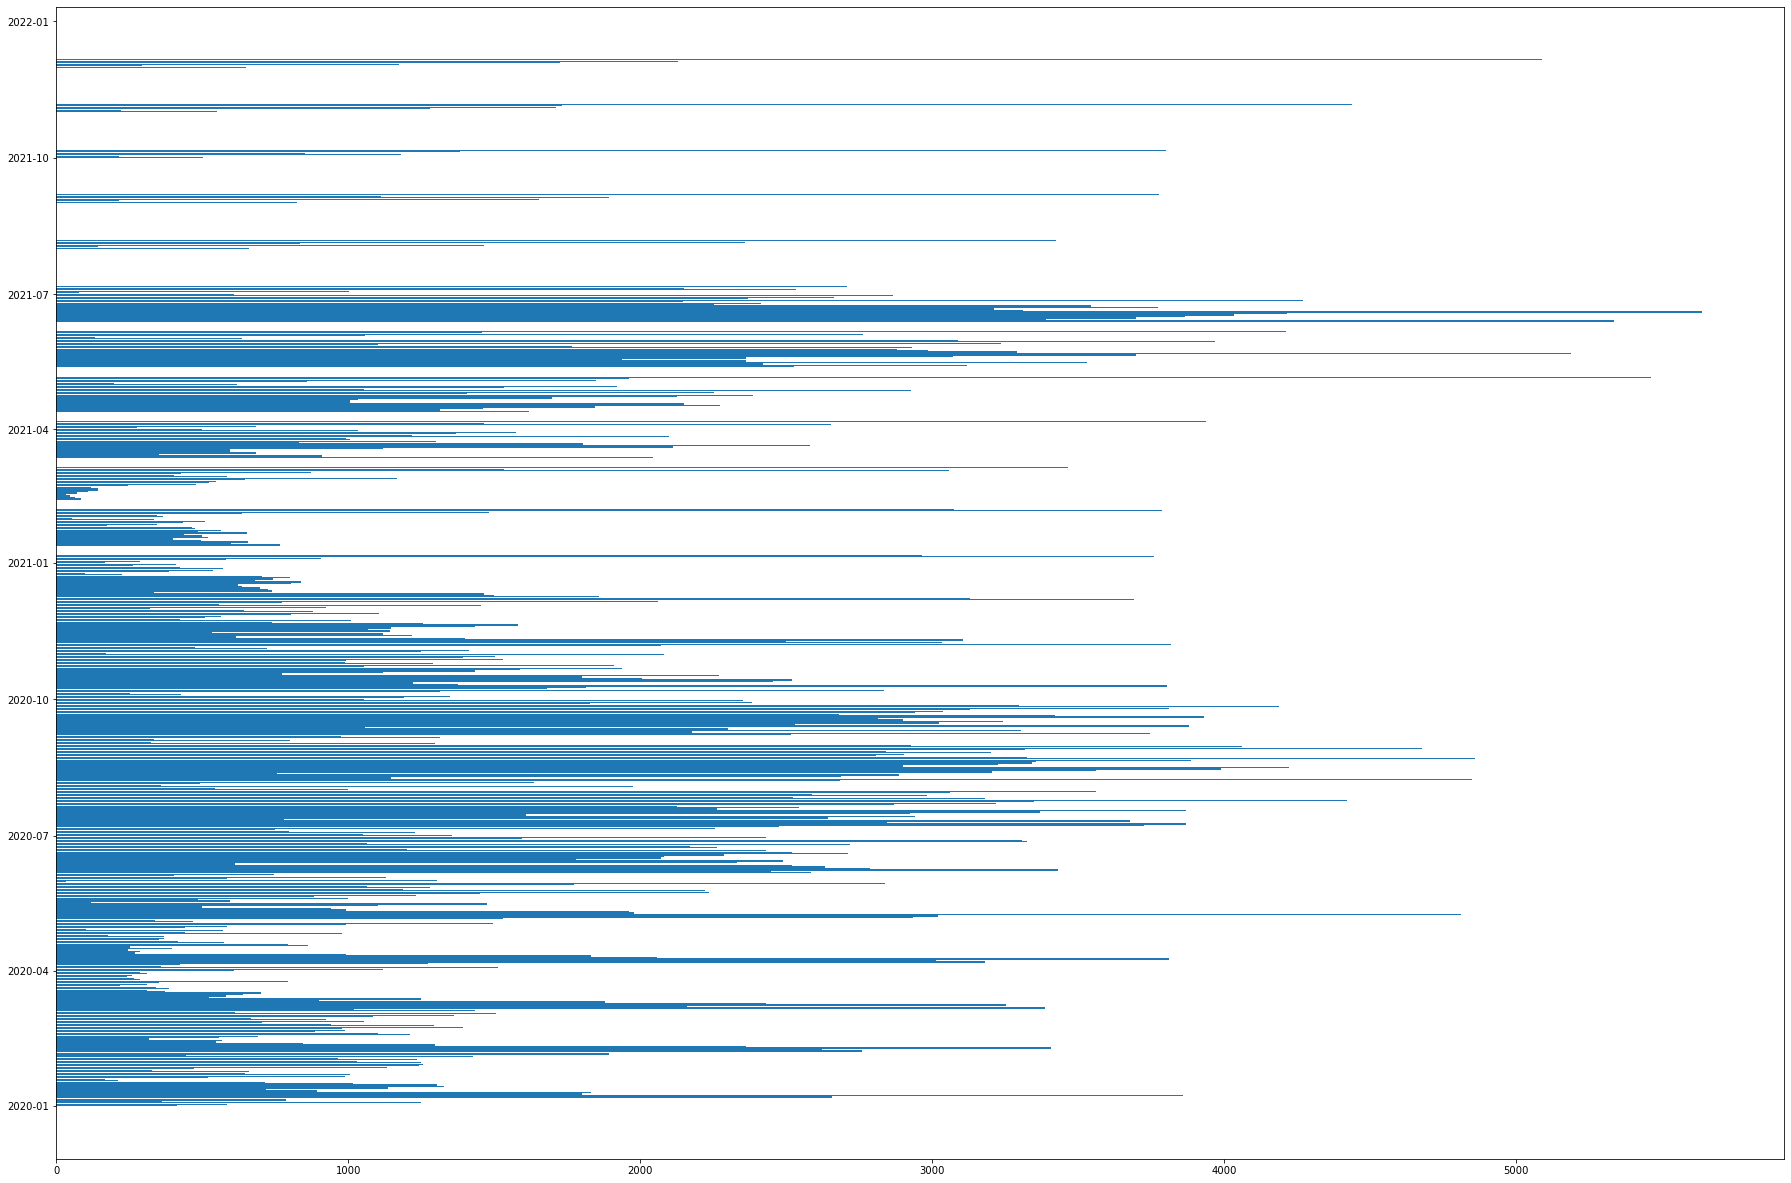

In [42]:
fig= plt.figure()
ax = fig.add_axes([0,0,4,4])
ax.barh(df_date['date'],df_date['counts'])
plt.show()
#Start date of riding the bike for both Annual members and Casual riders

In [43]:
#Rearranging the datetime to date
dff['ended_at'] = pd.to_datetime(dff['ended_at']).dt.normalize()

In [44]:
#Grouping the date
by_date = pd.Series(dff['ended_at']).value_counts().sort_index()
by_date.index = pd.DatetimeIndex(by_date.index)
df_datei = by_date.rename_axis('date').reset_index(name='counts')
df_datei

,date,counts
0,2020-01-01,410
1,2020-01-02,584
2,2020-01-03,1247
3,2020-01-04,361
4,2020-01-05,783
...,...,...
544,2021-12-02,295
545,2021-12-03,1175
546,2021-12-04,1722
547,2021-12-05,2132


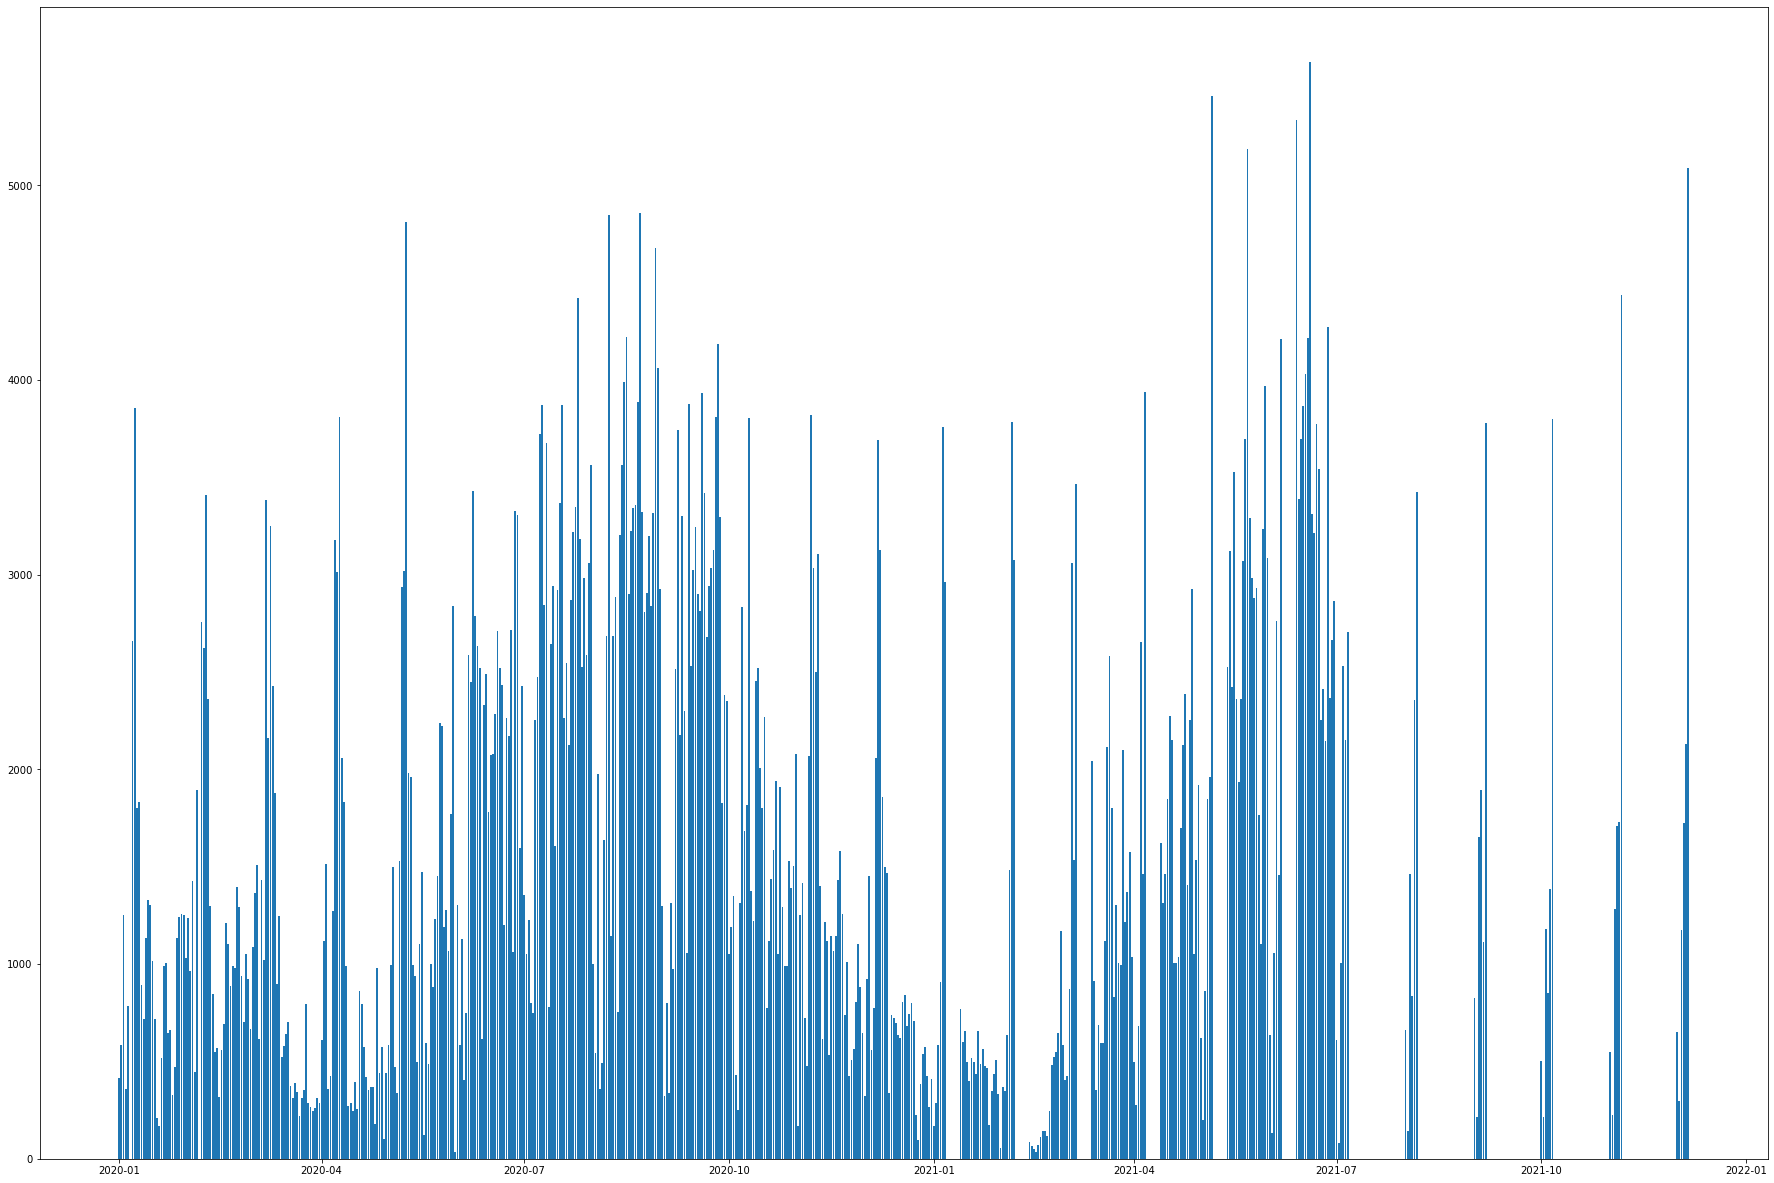

In [45]:
#End date for both Annual members and Casual riders
fig= plt.figure()
ax = fig.add_axes([0,0,4,4])
ax.bar(df_date['date'],df_date['counts'])
plt.show()

In [46]:
#Rearranging datetime to date for members only
newdff['started_at'] = pd.to_datetime(newdff['started_at']).dt.normalize()

In [47]:
#Grouping the date for members only
by_date = pd.Series(newdff['started_at']).value_counts().sort_index()
by_date.index = pd.DatetimeIndex(by_date.index)
df_datey = by_date.rename_axis('date').reset_index(name='counts')
df_datey

,date,counts
0,2020-01-01,326
1,2020-01-02,524
2,2020-01-03,817
3,2020-01-04,312
4,2020-01-05,568
...,...,...
540,2021-12-02,248
541,2021-12-03,836
542,2021-12-04,1142
543,2021-12-05,1463


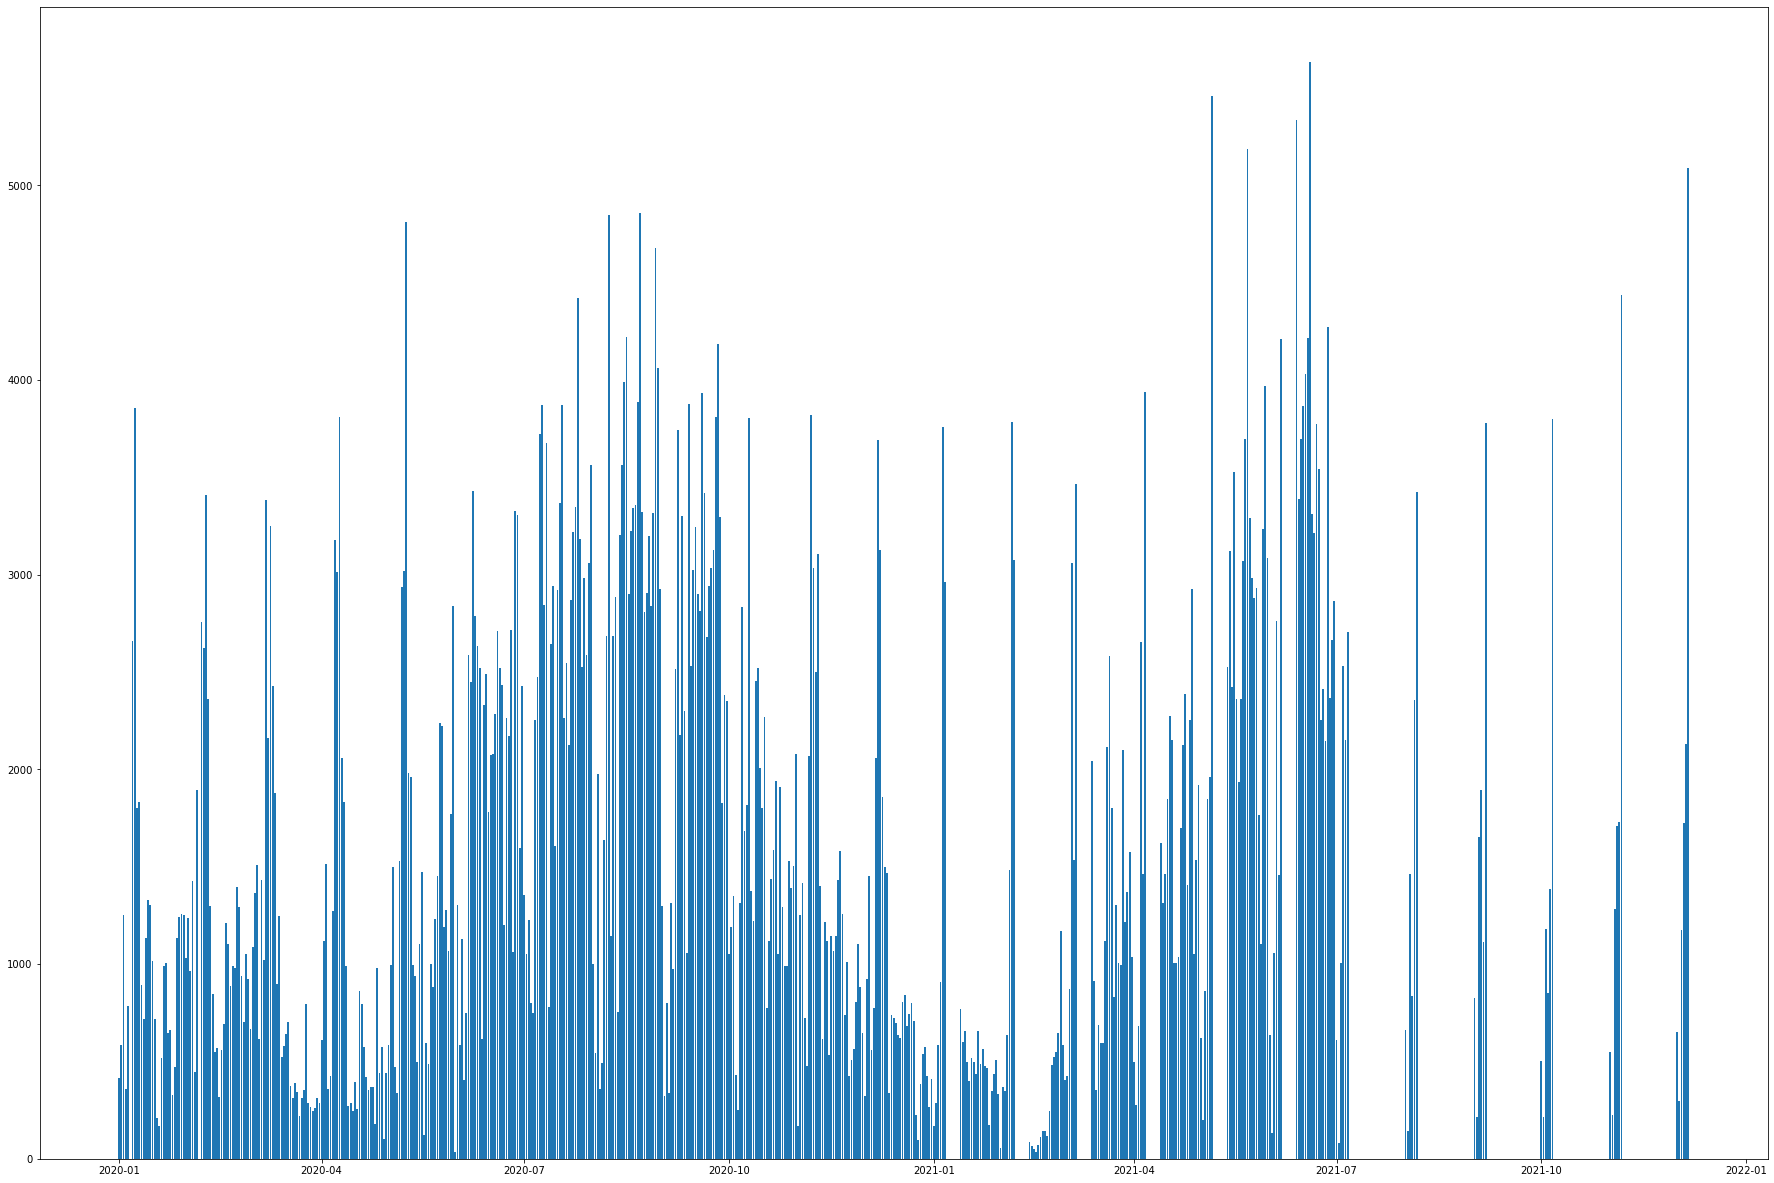

In [48]:
#Start date for only members
fig= plt.figure()
ax = fig.add_axes([0,0,4,4])
ax.bar(df_date['date'],df_date['counts'])
plt.show()

In [49]:
#Rearranging end-datetime to date for members
newdff['ended_at'] = pd.to_datetime(newdff['ended_at']).dt.normalize()

In [50]:
#Grouping the enddate for members only
by_date = pd.Series(newdff['ended_at']).value_counts().sort_index()
by_date.index = pd.DatetimeIndex(by_date.index)
df_dater = by_date.rename_axis('date').reset_index(name='counts')
df_dater


,date,counts
0,2020-01-01,326
1,2020-01-02,523
2,2020-01-03,818
3,2020-01-04,312
4,2020-01-05,567
...,...,...
541,2021-12-02,248
542,2021-12-03,836
543,2021-12-04,1138
544,2021-12-05,1465


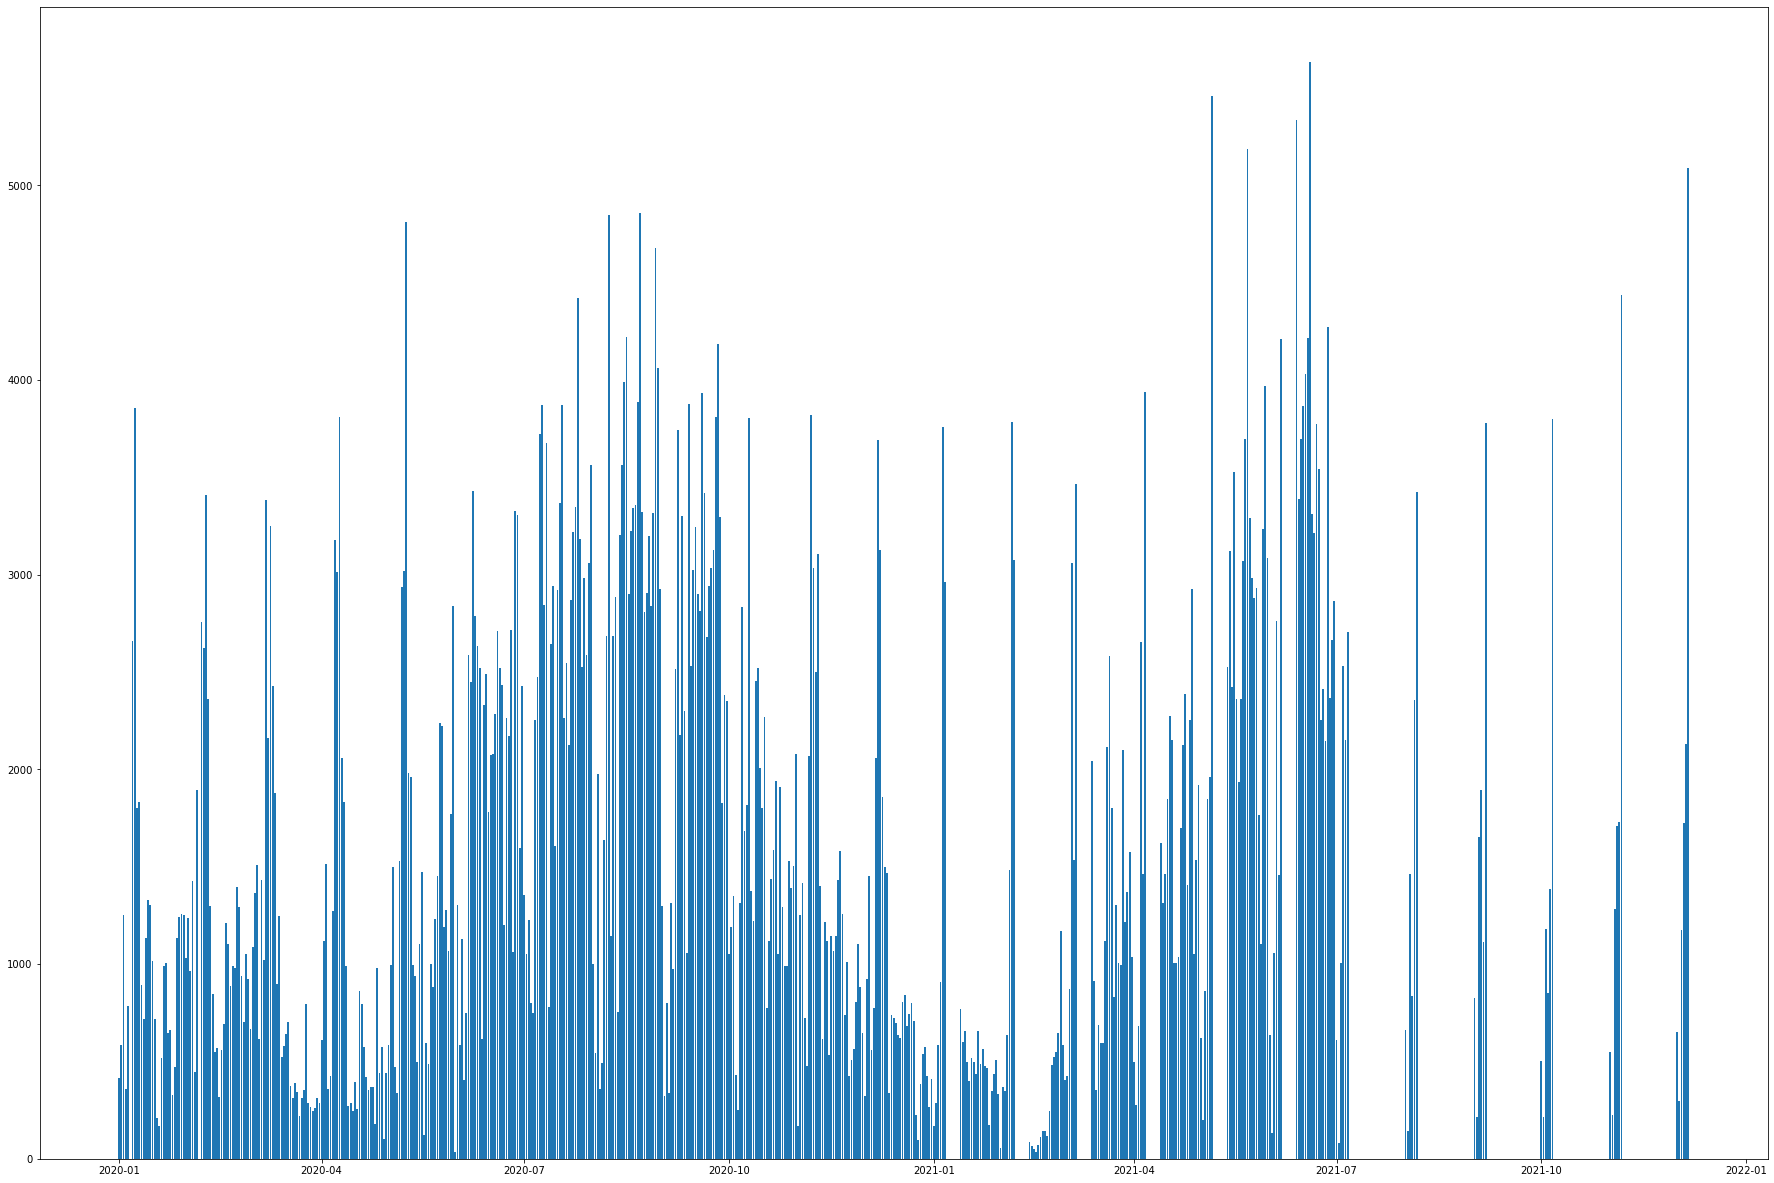

In [51]:
#End date for members only
fig= plt.figure()
ax = fig.add_axes([0,0,4,4])
ax.bar(df_date['date'],df_date['counts'])
plt.show()

In [52]:
#Rearranging start datetime to date for casual member
newdf_causall['started_at'] = pd.to_datetime(newdf_causall['started_at']).dt.normalize()

In [53]:
#Grouping the date for casual member
by_date = pd.Series(newdf_causall['started_at']).value_counts().sort_index()
by_date.index = pd.DatetimeIndex(by_date.index)
df_datex = by_date.rename_axis('date').reset_index(name='counts')
df_datex

,date,counts
0,2020-01-01,87
1,2020-01-02,61
2,2020-01-03,434
3,2020-01-04,49
4,2020-01-05,219
...,...,...
540,2021-12-02,47
541,2021-12-03,339
542,2021-12-04,584
543,2021-12-05,668


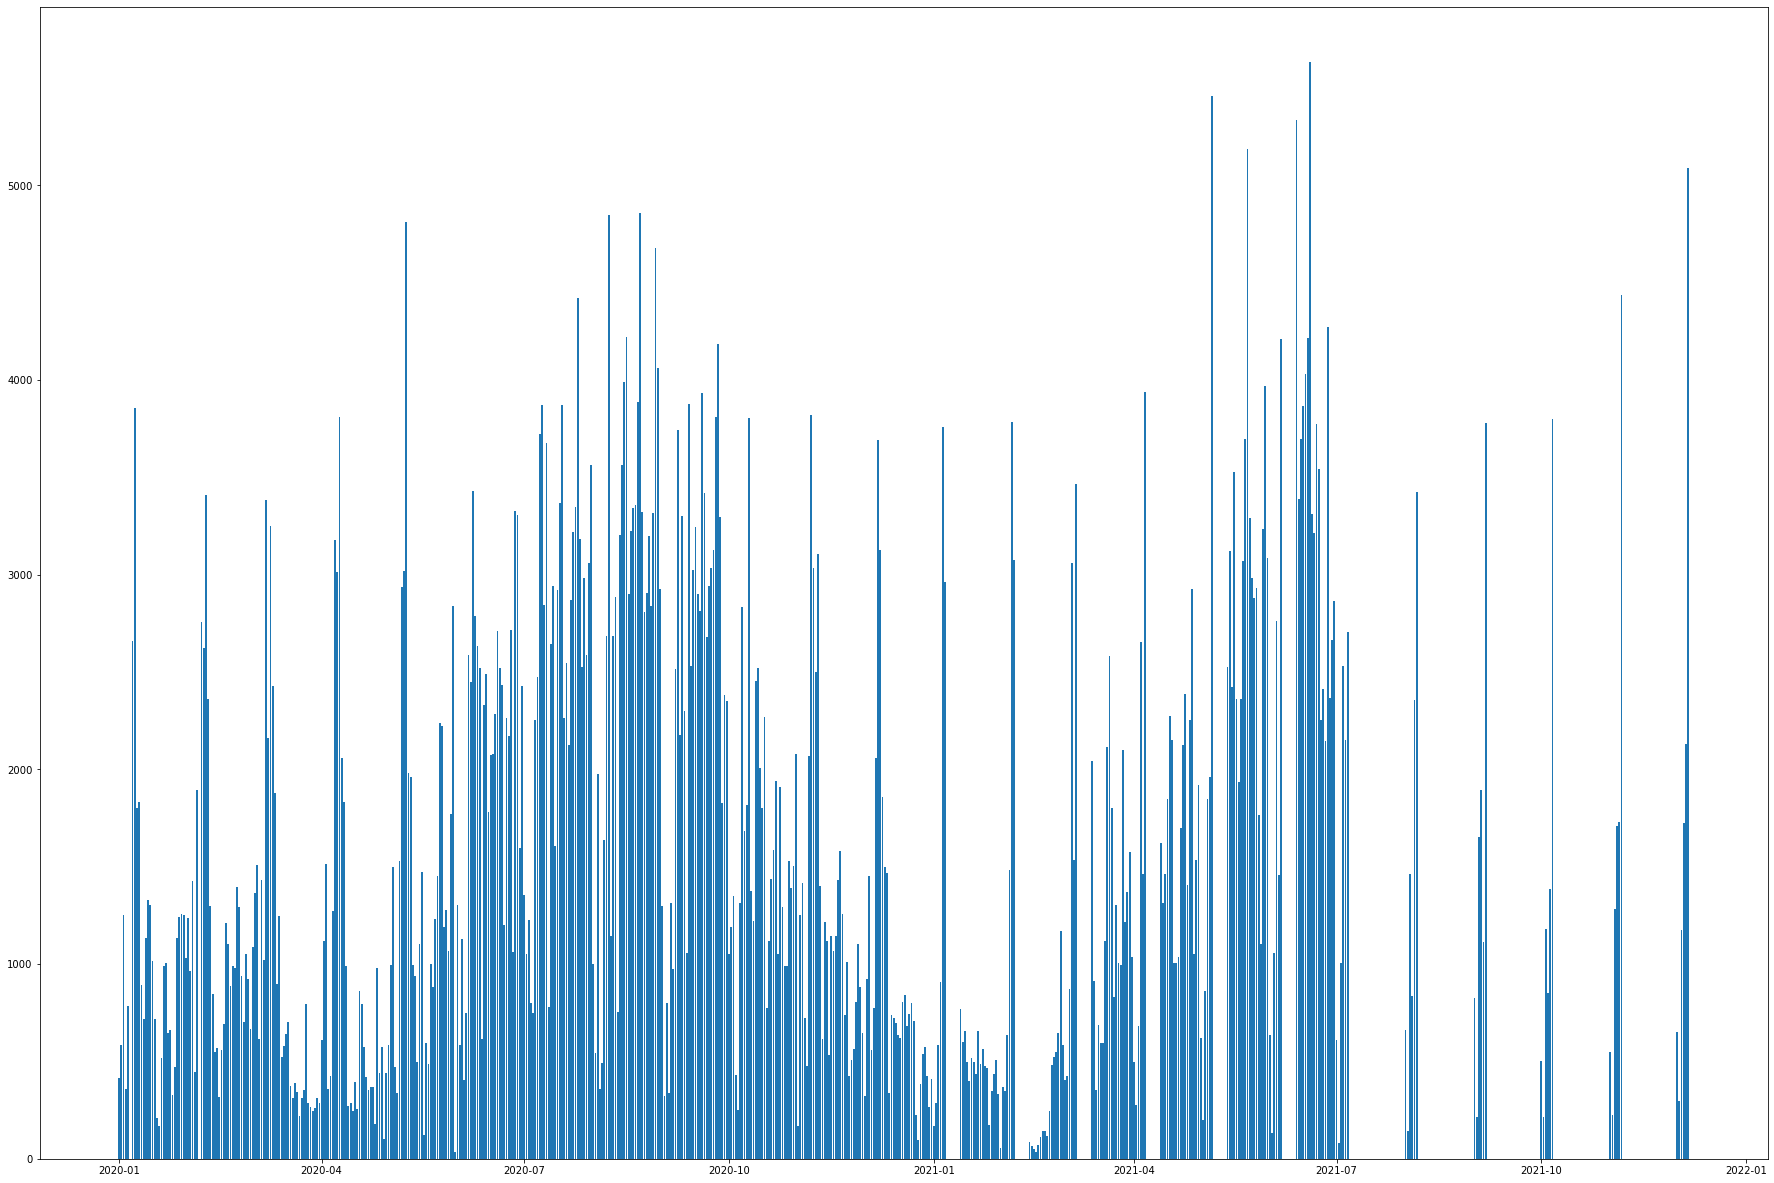

In [54]:
#Start date for casual riders only
fig= plt.figure()
ax = fig.add_axes([0,0,4,4])
ax.bar(df_date['date'],df_date['counts'])
plt.show()

In [55]:
#Rearranging the end-datetime to date for casual member
newdf_causall['ended_at'] = pd.to_datetime(newdf_causall['ended_at']).dt.normalize()

In [56]:
#Grouping the date
by_date = pd.Series(newdf_causall['ended_at']).value_counts().sort_index()
by_date.index = pd.DatetimeIndex(by_date.index)
df_datez = by_date.rename_axis('date').reset_index(name='counts')
df_datez

,date,counts
0,2020-01-01,84
1,2020-01-02,61
2,2020-01-03,429
3,2020-01-04,49
4,2020-01-05,216
...,...,...
544,2021-12-02,47
545,2021-12-03,339
546,2021-12-04,584
547,2021-12-05,667


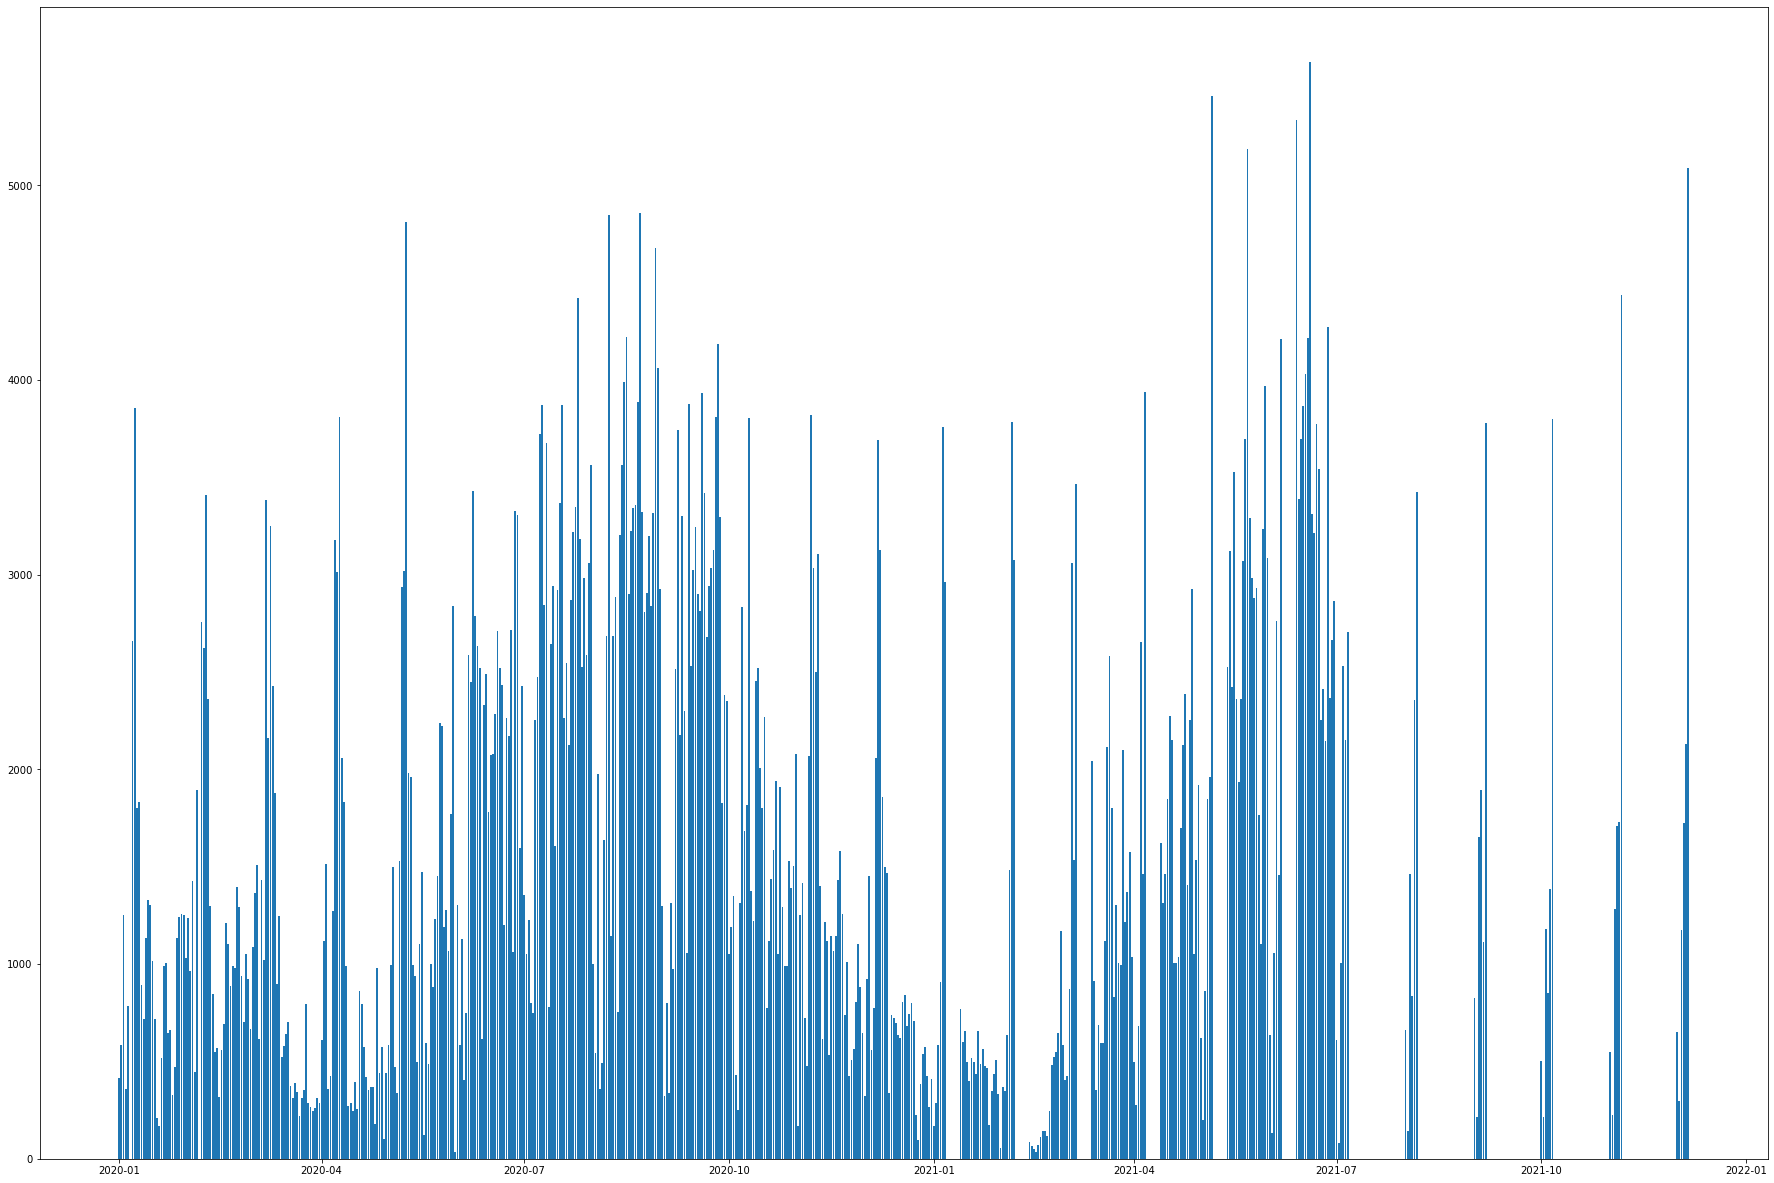

In [57]:
#End date for Casual riders only
fig= plt.figure()
ax = fig.add_axes([0,0,4,4])
ax.bar(df_date['date'],df_date['counts'])
plt.show()

In [58]:
#Grouping the start station for both Annual members and Casual riders
by_station = pd.Series(dff['start_station_name']).value_counts().sort_index()
by_station.index = pd.Index(by_station.index)
dff_station = by_station.rename_axis('station').reset_index(name='counts')
dff_station

,station,counts
0,2112 W Peterson Ave,209
1,63rd St Beach,488
2,900 W Harrison St,1190
3,Aberdeen St & Jackson Blvd,2344
4,Aberdeen St & Monroe St,1979
...,...,...
704,Woodlawn Ave & 55th St,1062
705,Woodlawn Ave & 75th St,17
706,Woodlawn Ave & Lake Park Ave,414
707,Yates Blvd & 75th St,55


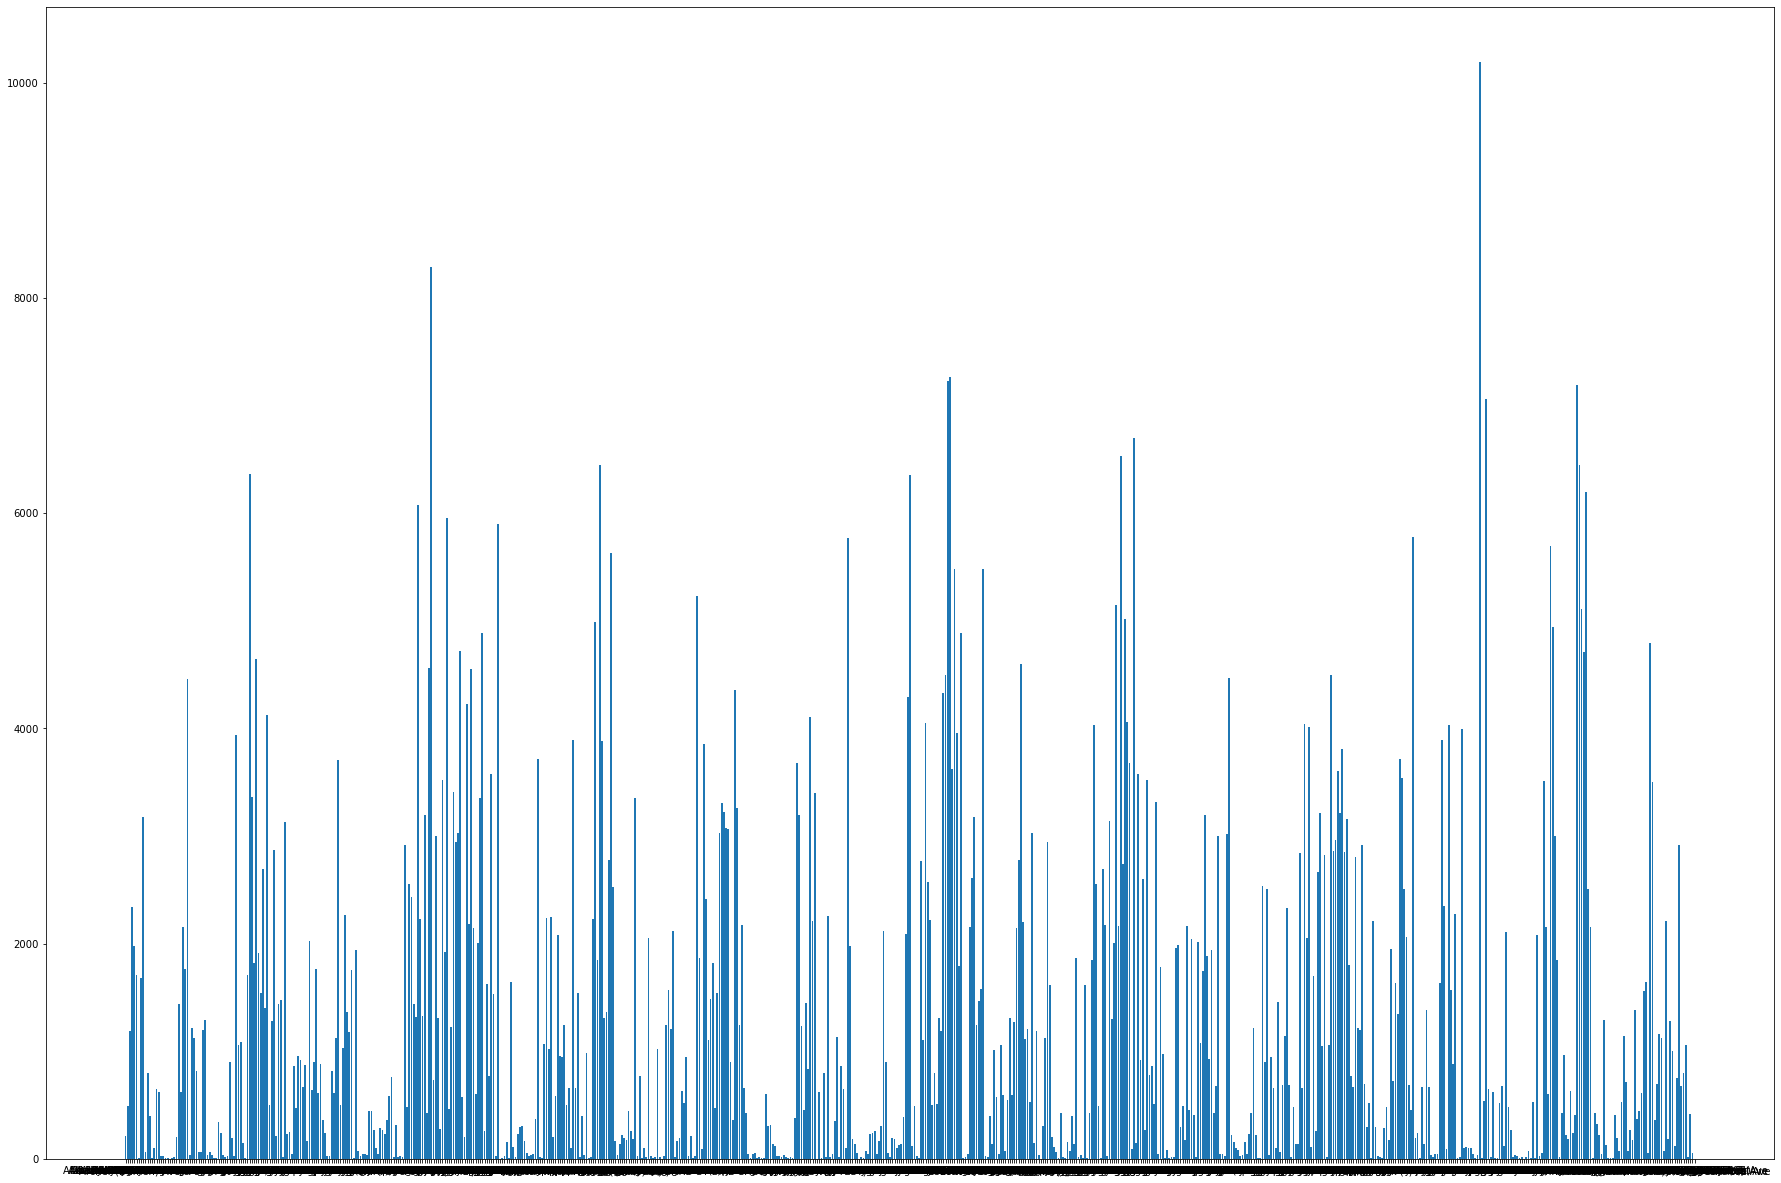

In [59]:
#Start station for Annual members and casual riders
fig= plt.figure()
ax = fig.add_axes([0,0,4,4])
ax.bar(dff_station['station'],dff_station['counts'])
plt.show()

In [60]:
#Grouping my end station for Annual members and Casual riders
by_station = pd.Series(dff['end_station_name']).value_counts().sort_index()
by_station.index = pd.Index(by_station.index)
dff_stationy = by_station.rename_axis('station').reset_index(name='counts')
dff_stationy

,station,counts
0,2112 W Peterson Ave,228
1,63rd St Beach,526
2,900 W Harrison St,1140
3,Aberdeen St & Jackson Blvd,2392
4,Aberdeen St & Monroe St,1996
...,...,...
706,Woodlawn Ave & 55th St,1122
707,Woodlawn Ave & 75th St,12
708,Woodlawn Ave & Lake Park Ave,417
709,Yates Blvd & 75th St,53


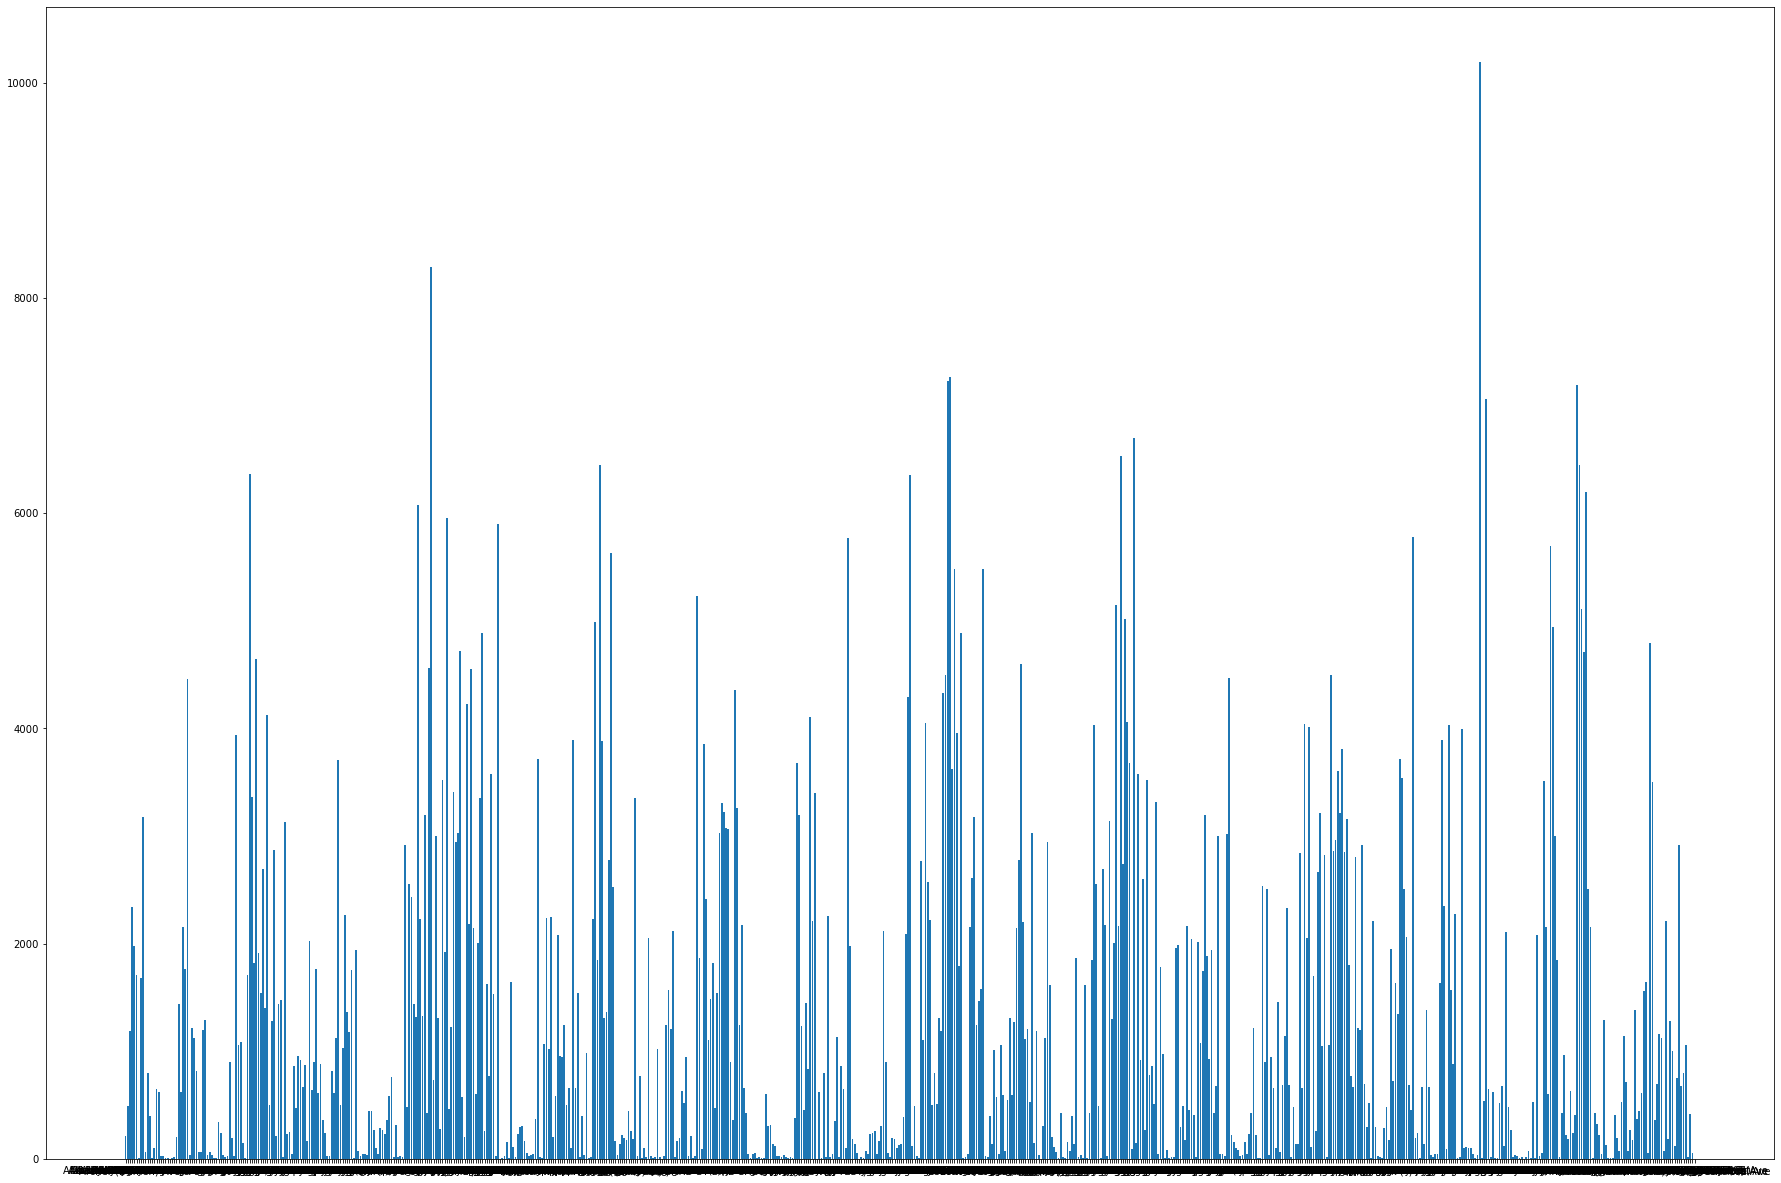

In [61]:
#End station for Annual members and Casual riders
fig= plt.figure()
ax = fig.add_axes([0,0,4,4])
ax.bar(dff_station['station'],dff_station['counts'])
plt.show()

In [62]:
#Grouping my start station for Annual members
by_station = pd.Series(newdff['start_station_name']).value_counts().sort_index()
by_station.index = pd.Index(by_station.index)
dff_stationp = by_station.rename_axis('station').reset_index(name='counts')
dff_stationp

,station,counts
0,2112 W Peterson Ave,137
1,63rd St Beach,232
2,900 W Harrison St,856
3,Aberdeen St & Jackson Blvd,1739
4,Aberdeen St & Monroe St,1474
...,...,...
676,Wood St & Taylor St (Temp),691
677,Woodlawn Ave & 55th St,664
678,Woodlawn Ave & 75th St,9
679,Woodlawn Ave & Lake Park Ave,237


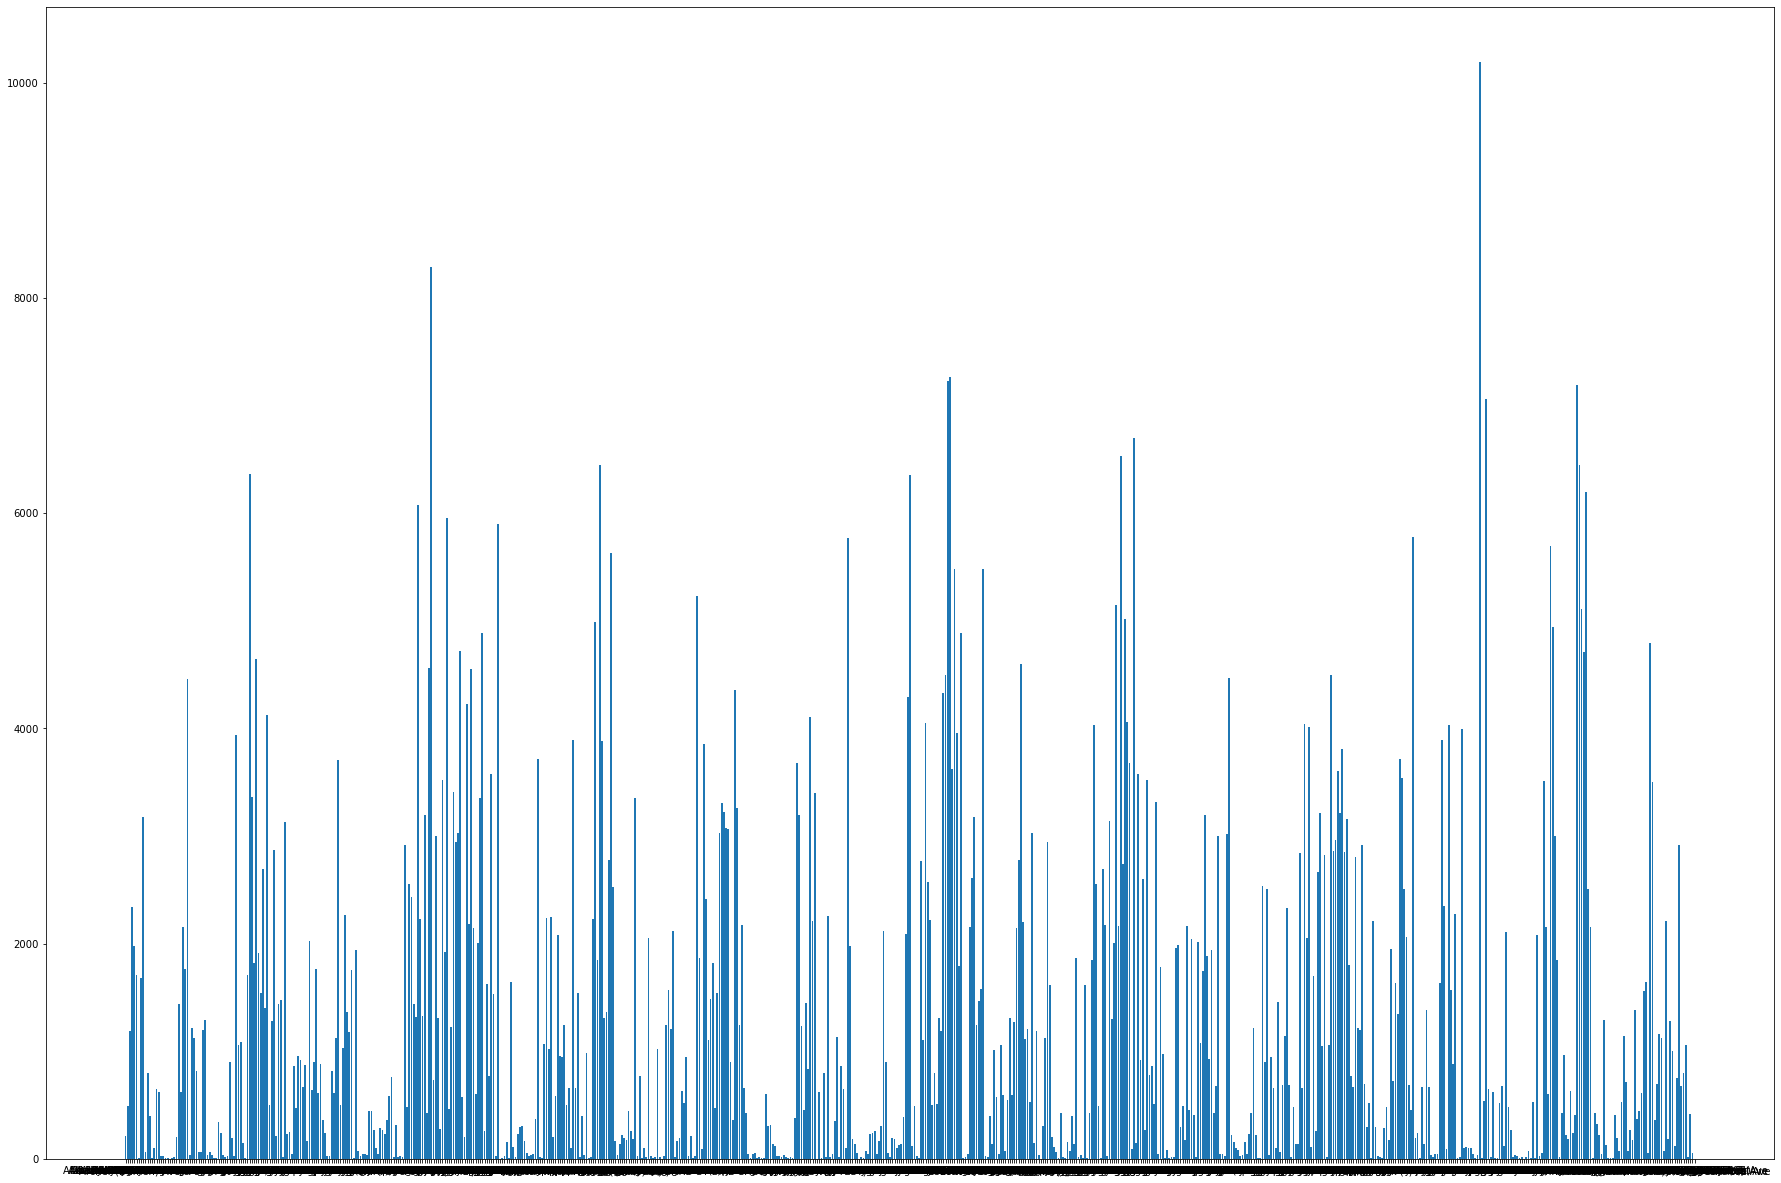

In [63]:
#Start station for Annual members 
fig= plt.figure()
ax = fig.add_axes([0,0,4,4])
ax.bar(dff_station['station'],dff_station['counts'])
plt.show()

In [64]:
#Grouping my end station for Annual members
by_station = pd.Series(newdff['end_station_name']).value_counts().sort_index()
by_station.index = pd.Index(by_station.index)
dff_stationa = by_station.rename_axis('station').reset_index(name='counts')
dff_stationa


,station,counts
0,2112 W Peterson Ave,155
1,63rd St Beach,264
2,900 W Harrison St,854
3,Aberdeen St & Jackson Blvd,1825
4,Aberdeen St & Monroe St,1491
...,...,...
685,Woodlawn Ave & 55th St,712
686,Woodlawn Ave & 75th St,7
687,Woodlawn Ave & Lake Park Ave,229
688,Yates Blvd & 75th St,18


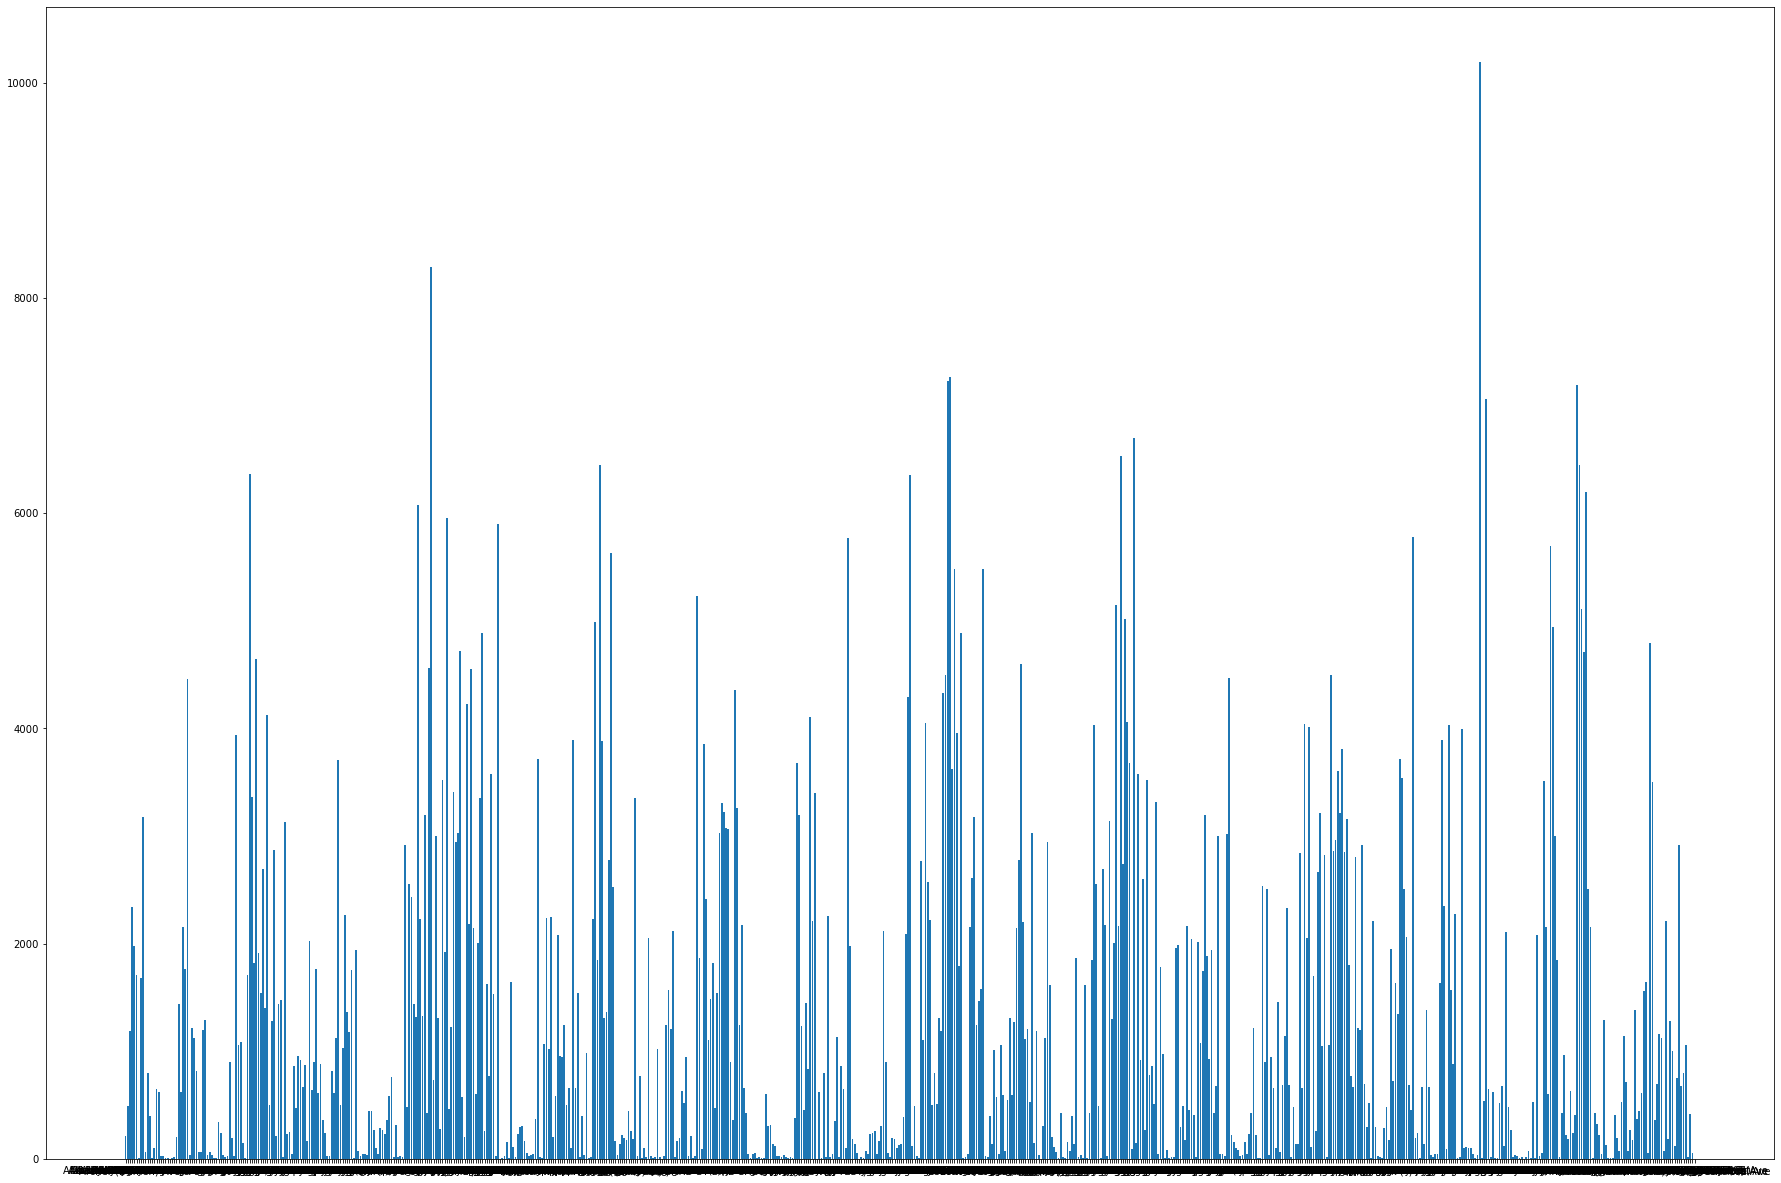

In [65]:
#End station for Annual members
fig= plt.figure()
ax = fig.add_axes([0,0,4,4])
ax.bar(dff_station['station'],dff_station['counts'])
plt.show()

In [66]:
#Grouping my start station for Casual riders
by_station = pd.Series(newdf_causall['start_station_name']).value_counts().sort_index()
by_station.index = pd.Index(by_station.index)
dff_stationm = by_station.rename_axis('station').reset_index(name='counts')
dff_stationm

,station,counts
0,2112 W Peterson Ave,72
1,63rd St Beach,256
2,900 W Harrison St,334
3,Aberdeen St & Jackson Blvd,605
4,Aberdeen St & Monroe St,505
...,...,...
700,Woodlawn Ave & 55th St,398
701,Woodlawn Ave & 75th St,8
702,Woodlawn Ave & Lake Park Ave,177
703,Yates Blvd & 75th St,32


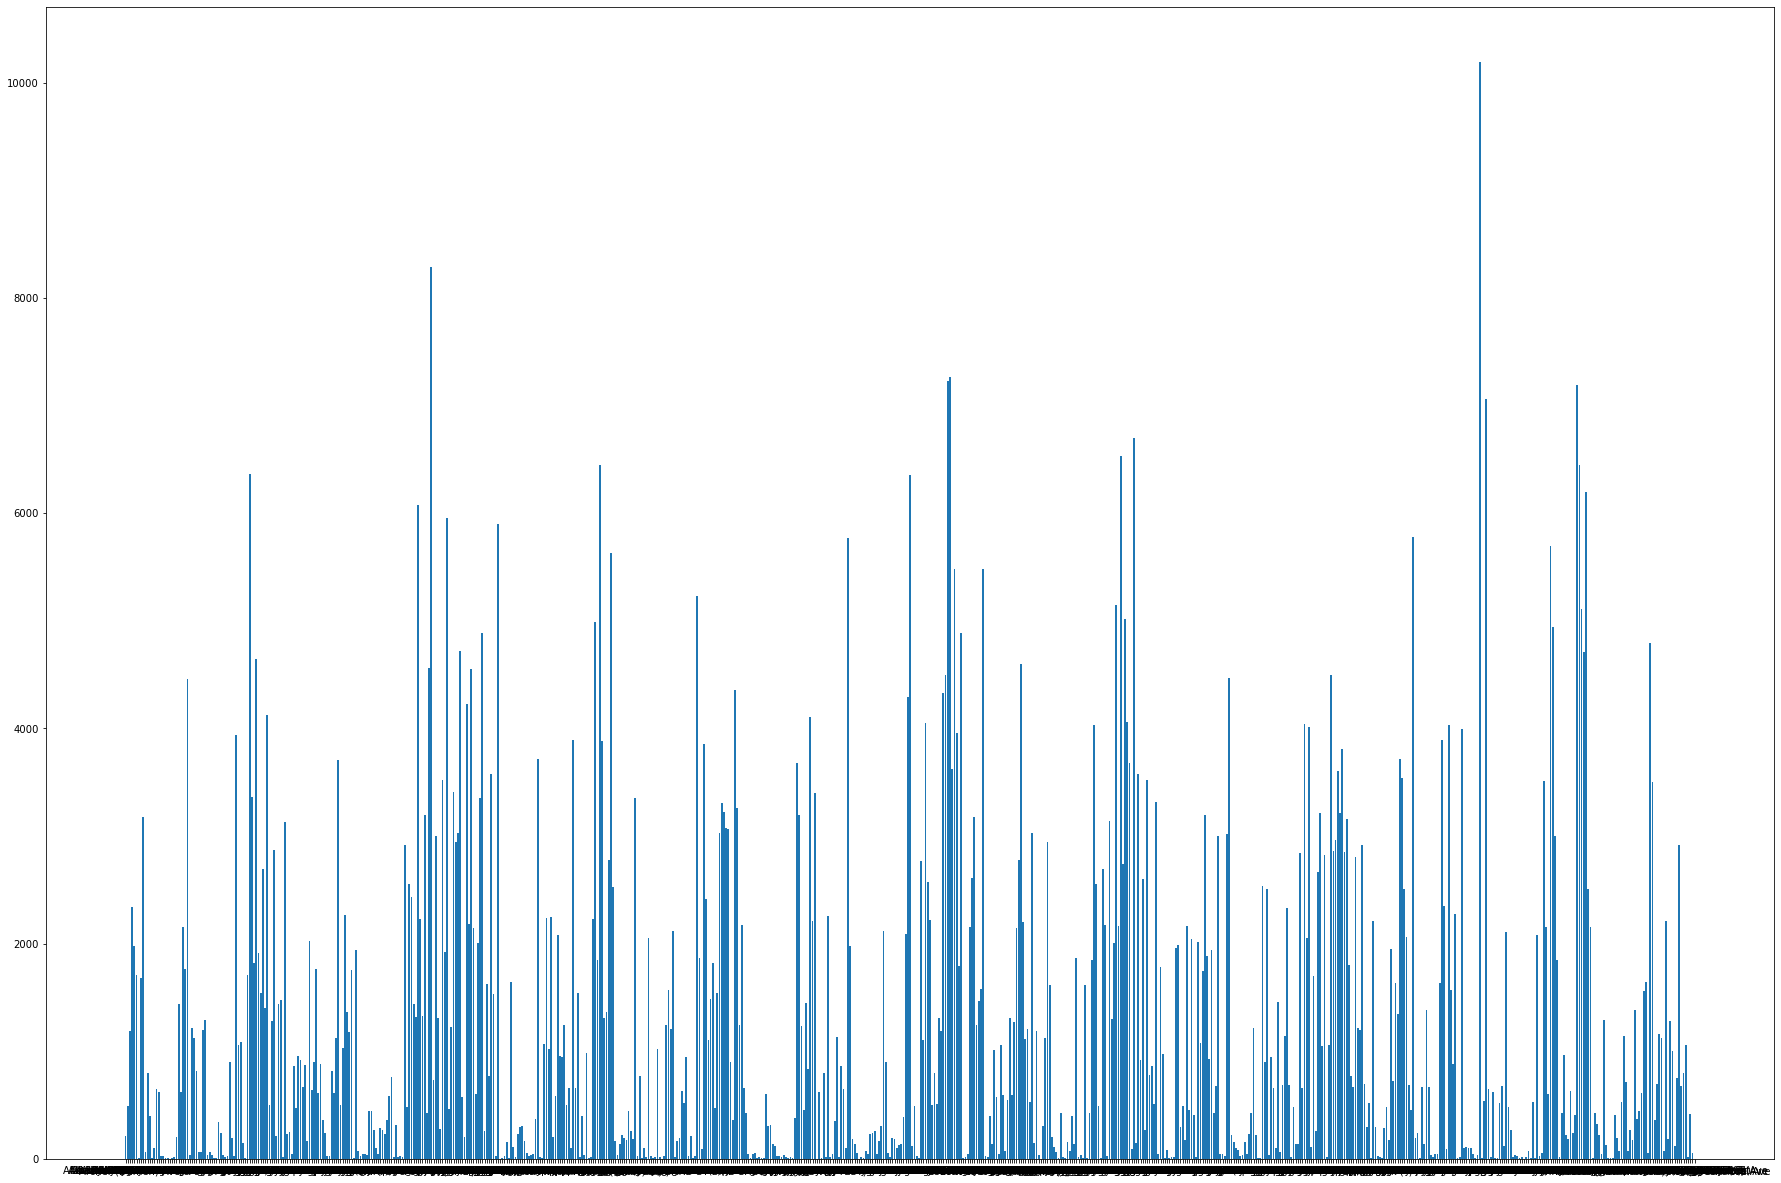

In [67]:
#Start station for Casual riders
fig= plt.figure()
ax = fig.add_axes([0,0,4,4])
ax.bar(dff_station['station'],dff_station['counts'])
plt.show()

In [68]:
#Grouping my end station for Casual riders
by_station = pd.Series(newdf_causall['end_station_name']).value_counts().sort_index()
by_station.index = pd.Index(by_station.index)
dff_stationoo= by_station.rename_axis('station').reset_index(name='counts')
dff_stationoo

,station,counts
0,2112 W Peterson Ave,73
1,63rd St Beach,262
2,900 W Harrison St,286
3,Aberdeen St & Jackson Blvd,567
4,Aberdeen St & Monroe St,505
...,...,...
702,Woodlawn Ave & 55th St,410
703,Woodlawn Ave & 75th St,5
704,Woodlawn Ave & Lake Park Ave,188
705,Yates Blvd & 75th St,35


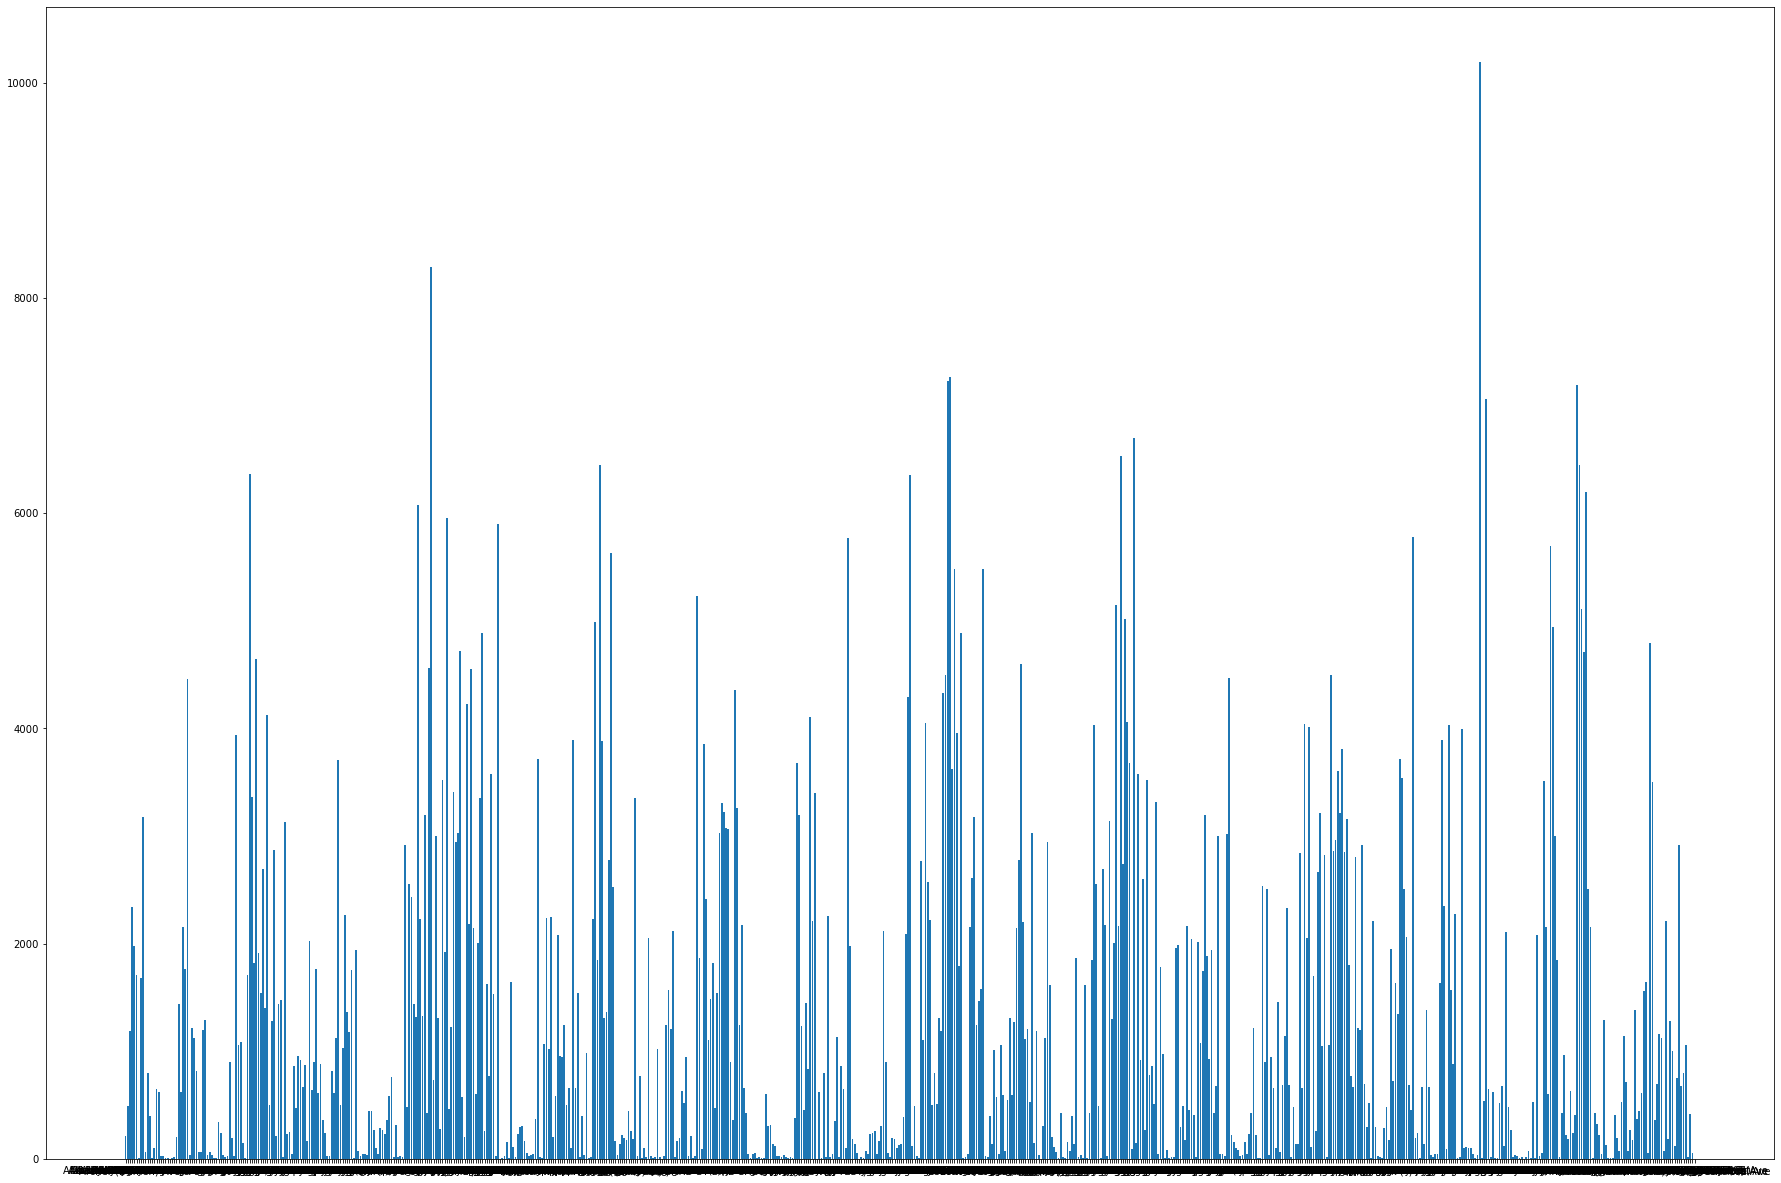

In [69]:
#End station for Casual riders
fig= plt.figure()
ax = fig.add_axes([0,0,4,4])
ax.bar(dff_station['station'],dff_station['counts'])
plt.show()

In [70]:
#Grouping the days of the week for Annual members and Casual riders 
by_days = pd.Series(dff['day_week_start']).value_counts().sort_index()
by_days.index = pd.Index(by_days.index)
dff_days = by_days.rename_axis('days').reset_index(name='counts')
dff_days

,days,counts
0,Friday,130369
1,Monday,110291
2,Saturday,158403
3,Sunday,134732
4,Thursday,118497
5,Tuesday,117149
6,Wednesday,121813


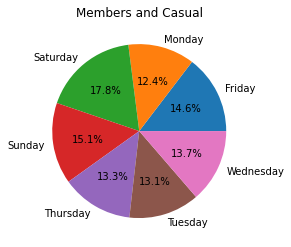

In [71]:
#pie chart for members and casual
plt.pie(dff_days['counts'],labels=dff_days['days'],autopct='%1.1f%%')
plt.title('Members and Casual')
plt.show()

In [72]:
#Grouping the days of the week for members only
by_days = pd.Series(newdff['day_week_start']).value_counts().sort_index()
by_days.index = pd.Index(by_days.index)
newdff_days = by_days.rename_axis('days').reset_index(name='counts')
newdff_days

,days,counts
0,Friday,81721
1,Monday,75369
2,Saturday,79950
3,Sunday,69798
4,Thursday,81274
5,Tuesday,82052
6,Wednesday,85111


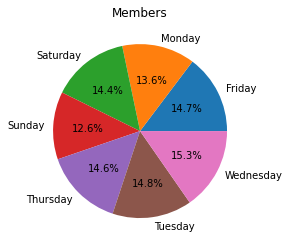

In [73]:
#pie chart for members
plt.pie(newdff_days['counts'],labels=newdff_days['days'],autopct='%1.1f%%')
plt.title('Members')
plt.show()

In [74]:
#Grouping the days of the week for Casual riders
by_days = pd.Series(newdf_causall['day_week_start']).value_counts().sort_index()
by_days.index = pd.Index(by_days.index)
df_causall_days = by_days.rename_axis('days').reset_index(name='counts')
df_causall_days

,days,counts
0,Friday,48648
1,Monday,34922
2,Saturday,78453
3,Sunday,64934
4,Thursday,37223
5,Tuesday,35097
6,Wednesday,36702


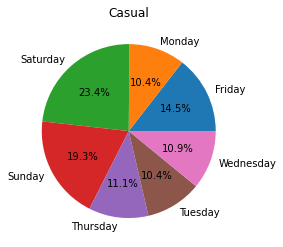

In [75]:
#pie chart for casual riders
plt.pie(df_causall_days['counts'],labels=df_causall_days['days'],autopct='%1.1f%%')
plt.title('Casual')
plt.show()

In [76]:
#Grouping the bikes for ridable bikes
by_rides = pd.Series(df['rideable_type']).value_counts().sort_index()
by_rides.index = pd.Index(by_rides.index)
df_rides = by_rides.rename_axis('bikes').reset_index(name='counts')
df_rides

,bikes,counts
0,classic_bike,229805
1,docked_bike,527678
2,electric_bike,133771


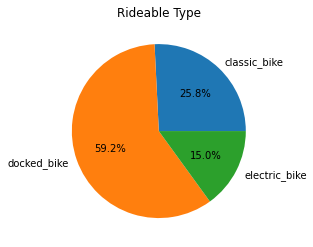

In [77]:
#pie chart for ridable bikes
plt.pie(df_rides['counts'],labels=df_rides['bikes'],autopct='%1.1f%%')
plt.title('Rideable Type')
plt.show()

In [78]:
#Grouping the bikes for members
by_rides = pd.Series(newdff['rideable_type']).value_counts().sort_index()
by_rides.index = pd.Index(by_rides.index)
newdff_rides = by_rides.rename_axis('bikes').reset_index(name='counts')
newdff_rides

,bikes,counts
0,classic_bike,151113
1,docked_bike,328631
2,electric_bike,75531


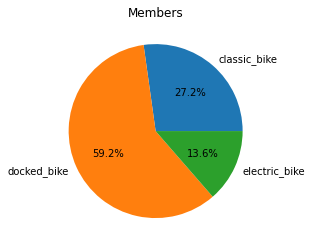

In [79]:
#pie chart for members
plt.pie(newdff_rides['counts'],labels=newdff_rides['bikes'],autopct='%1.1f%%')
plt.title('Members')
plt.show()

In [80]:
#Grouping the bikes for casual
by_rides = pd.Series(newdf_causall['rideable_type']).value_counts().sort_index()
by_rides.index = pd.Index(by_rides.index)
Cdff_rides = by_rides.rename_axis('bikes').reset_index(name='counts')
Cdff_rides

,bikes,counts
0,classic_bike,78692
1,docked_bike,199047
2,electric_bike,58240


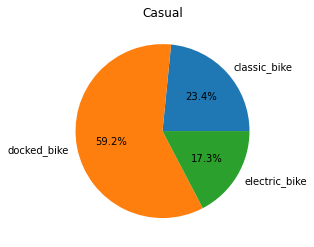

In [81]:
#pie chart for casual
plt.pie(Cdff_rides['counts'],labels=Cdff_rides['bikes'],autopct='%1.1f%%')
plt.title('Casual')
plt.show()

In [82]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [83]:
#converted the casual and member to numeric values
dff['member_casual'].replace({'member':'0','casual':'1'},inplace = True)
dff

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,day_week_start,duration,distance
0,000001004784CD35,docked_bike,2020-07-22,2020-07-22,Wolcott (Ravenswood) Ave & Montrose Ave,238,Southport Ave & Clybourn Ave,307,1,Wednesday,1824,42501.53
2,00000550C665101A,docked_bike,2020-06-06,2020-06-06,Sheffield Ave & Waveland Ave,114,Kedzie Ave & Milwaukee Ave,260,1,Saturday,10808,56896.25
3,0000127970C84F62,docked_bike,2020-05-30,2020-05-30,Green St & Madison St,198,Wells St & Concord Ln,289,0,Saturday,1892,33329.42
4,00001A81D056B01B,classic_bike,2021-04-14,2021-04-14,Wood St & Hubbard St,13432,Morgan St & Lake St,TA1306000015,0,Wednesday,903,19670.18
5,00001DCF2BC423F4,docked_bike,2021-06-13,2021-06-13,Millennium Park,13008,Fort Dearborn Dr & 31st St,TA1307000048,1,Sunday,2902,45342.48
...,...,...,...,...,...,...,...,...,...,...,...,...
1048567,30AEC22B3883E7D8,docked_bike,2020-08-02,2020-08-02,Broadway & Wilson Ave,293,Clark St & Grace St,165,0,Saturday,957,14441.95
1048569,30AEC890D6A33761,docked_bike,2020-07-15,2020-07-15,Halsted St & Dickens Ave,225,Wilton Ave & Diversey Pkwy,13,1,Wednesday,815,13069.66
1048571,30AEDC26BD2743AE,docked_bike,2020-06-08,2020-06-08,Loomis St & Jackson Blvd,146,Ashland Ave & Chicago Ave,350,0,Thursday,1056,18913.07
1048573,30AEE3AAB01939A4,classic_bike,2021-03-03,2021-03-03,Daley Center Plaza,TA1306000010,St. Clair St & Erie St,13016,1,Wednesday,28161,12199.12


Text(0, 0.5, 'duration')

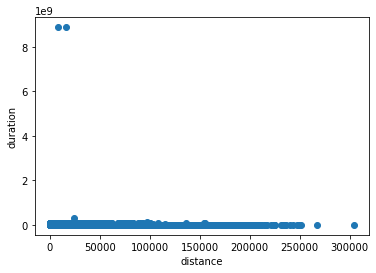

In [84]:
plt.scatter(dff.distance,dff['duration'])
plt.xlabel('distance')
plt.ylabel('duration')

In [85]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(dff[['distance','duration']])
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [86]:
dff['cluster']=y_predicted
dff.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,day_week_start,duration,distance,cluster
0,000001004784CD35,docked_bike,2020-07-22,2020-07-22,Wolcott (Ravenswood) Ave & Montrose Ave,238,Southport Ave & Clybourn Ave,307,1,Wednesday,1824,42501.53,0
2,00000550C665101A,docked_bike,2020-06-06,2020-06-06,Sheffield Ave & Waveland Ave,114,Kedzie Ave & Milwaukee Ave,260,1,Saturday,10808,56896.25,0
3,0000127970C84F62,docked_bike,2020-05-30,2020-05-30,Green St & Madison St,198,Wells St & Concord Ln,289,0,Saturday,1892,33329.42,0
4,00001A81D056B01B,classic_bike,2021-04-14,2021-04-14,Wood St & Hubbard St,13432,Morgan St & Lake St,TA1306000015,0,Wednesday,903,19670.18,0
5,00001DCF2BC423F4,docked_bike,2021-06-13,2021-06-13,Millennium Park,13008,Fort Dearborn Dr & 31st St,TA1307000048,1,Sunday,2902,45342.48,0


In [87]:
km.cluster_centers_

array([[2.36682718e+04, 8.72819834e+03],
       [1.21196550e+04, 8.87285324e+09],
       [2.95514380e+04, 7.26250845e+07],
       [2.44616000e+04, 3.17913024e+08],
       [5.23425855e+04, 1.26079750e+07]])

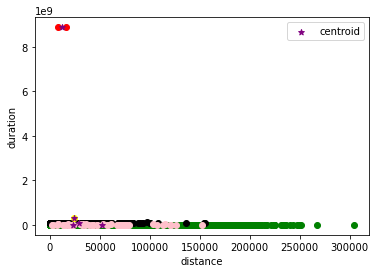

In [88]:
df1 = dff[dff.cluster==0]
df2 = dff[dff.cluster==1]
df3 = dff[dff.cluster==2]
df4 = dff[dff.cluster==3]
df5 = dff[dff.cluster==4]
plt.scatter(df1.distance,df1['duration'],color='green')
plt.scatter(df2.distance,df2['duration'],color='red')
plt.scatter(df3.distance,df3['duration'],color='black')
plt.scatter(df4.distance,df4['duration'],color='yellow')
plt.scatter(df5.distance,df5['duration'],color='pink')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('distance')
plt.ylabel('duration')
plt.legend()

In [89]:
scaler = MinMaxScaler()

scaler.fit(dff[['duration']])
dff['duration'] = scaler.transform(dff[['duration']])

scaler.fit(dff[['distance']])
dff['distance'] = scaler.transform(dff[['distance']])

In [90]:
dff.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,day_week_start,duration,distance,cluster
0,000001004784CD35,docked_bike,2020-07-22,2020-07-22,Wolcott (Ravenswood) Ave & Montrose Ave,238,Southport Ave & Clybourn Ave,307,1,Wednesday,2.053866e-07,0.139672,0
2,00000550C665101A,docked_bike,2020-06-06,2020-06-06,Sheffield Ave & Waveland Ave,114,Kedzie Ave & Milwaukee Ave,260,1,Saturday,1.217561e-06,0.186977,0
3,0000127970C84F62,docked_bike,2020-05-30,2020-05-30,Green St & Madison St,198,Wells St & Concord Ln,289,0,Saturday,2.130478e-07,0.109530,0
4,00001A81D056B01B,classic_bike,2021-04-14,2021-04-14,Wood St & Hubbard St,13432,Morgan St & Lake St,TA1306000015,0,Wednesday,1.016230e-07,0.064642,0
5,00001DCF2BC423F4,docked_bike,2021-06-13,2021-06-13,Millennium Park,13008,Fort Dearborn Dr & 31st St,TA1307000048,1,Sunday,3.268385e-07,0.149008,0


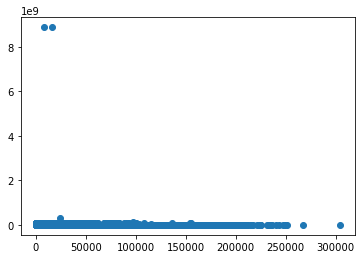

In [91]:
plt.scatter(df.distance,df['duration'])

In [92]:
sse = []                               #each of the cluster try to compute the distance of indivial datapoints from centroid
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(dff[['distance','duration']])
    sse.append(km.inertia_)

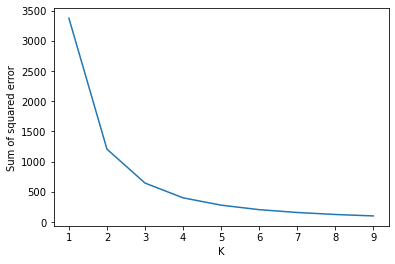

In [93]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

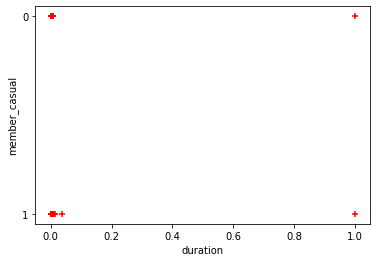

In [94]:
%matplotlib inline
plt.xlabel('duration')
plt.ylabel('member_casual')
plt.scatter(dff.duration,dff.member_casual,color='red',marker='+')

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
dffn = dff.head(20)

In [98]:
dffn

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,day_week_start,duration,distance,cluster
0,000001004784CD35,docked_bike,2020-07-22,2020-07-22,Wolcott (Ravenswood) Ave & Montrose Ave,238,Southport Ave & Clybourn Ave,307,1,Wednesday,2.053866e-07,0.139672,0
2,00000550C665101A,docked_bike,2020-06-06,2020-06-06,Sheffield Ave & Waveland Ave,114,Kedzie Ave & Milwaukee Ave,260,1,Saturday,1.217561e-06,0.186977,0
3,0000127970C84F62,docked_bike,2020-05-30,2020-05-30,Green St & Madison St,198,Wells St & Concord Ln,289,0,Saturday,2.130478e-07,0.109530,0
4,00001A81D056B01B,classic_bike,2021-04-14,2021-04-14,Wood St & Hubbard St,13432,Morgan St & Lake St,TA1306000015,0,Wednesday,1.016230e-07,0.064642,0
5,00001DCF2BC423F4,docked_bike,2021-06-13,2021-06-13,Millennium Park,13008,Fort Dearborn Dr & 31st St,TA1307000048,1,Sunday,3.268385e-07,0.149008,0
6,00001E17DEF40948,docked_bike,2020-08-07,2020-08-07,Wabash Ave & Roosevelt Rd,59,Indiana Ave & 26th St,147,0,Wednesday,1.413934e-07,0.071704,0
7,00002279D7D315A5,docked_bike,2020-09-26,2020-09-26,Aberdeen St & Monroe St,80,Rush St & Superior St,161,1,Saturday,2.788436e-07,0.109601,0
8,000027AD78DF9CE8,docked_bike,2020-06-27,2020-06-27,Halsted St & Wrightwood Ave,349,Pine Grove Ave & Waveland Ave,232,0,Saturday,1.266344e-07,0.068824,0
9,0000370913F39D28,docked_bike,2020-09-07,2020-09-07,LaSalle St & Jackson Blvd,283,Clark St & Drummond Pl,220,0,Thursday,3.014891e-07,0.179144,0
10,0000376F8A298CB2,docked_bike,2020-08-14,2020-08-14,Clark St & Lake St,38,Michigan Ave & 18th St,273,1,Friday,3.173748e-07,0.094999,0


Text(0, 0.5, 'duration')

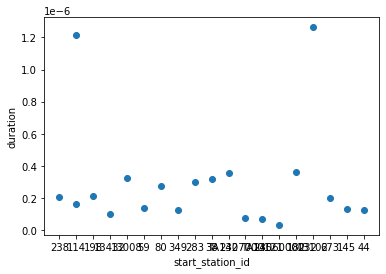

In [99]:
plt.scatter(dffn.start_station_id,dffn['duration'])
plt.xlabel('start_station_id')
plt.ylabel('duration')

Text(0, 0.5, 'duration')

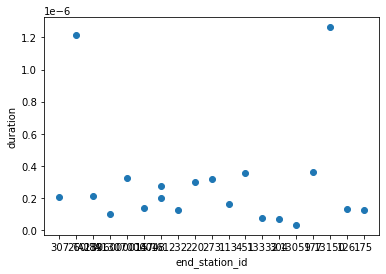

In [100]:
plt.scatter(dffn.end_station_id,dffn['duration'])
plt.xlabel('end_station_id')
plt.ylabel('duration')

Text(0, 0.5, 'distance')

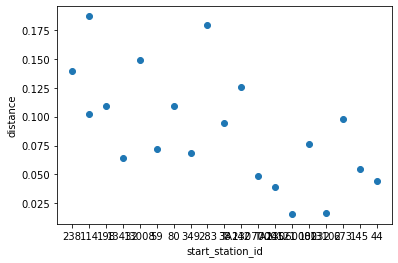

In [101]:
plt.scatter(dffn.start_station_id,dffn['distance'])
plt.xlabel('start_station_id')
plt.ylabel('distance')

Text(0, 0.5, 'distance')

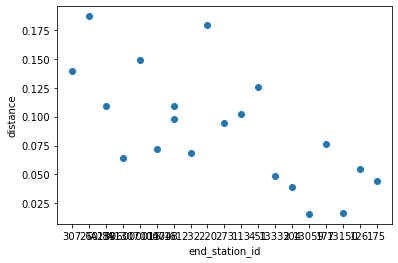

In [102]:
plt.scatter(dffn.end_station_id,dffn['distance'])
plt.xlabel('end_station_id')
plt.ylabel('distance')

Text(0, 0.5, 'duration')

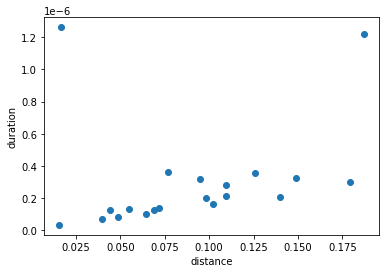

In [103]:
plt.scatter(dffn.distance,dffn['duration'])
plt.xlabel('distance')
plt.ylabel('duration')

In [104]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(dffn[['distance','duration']])
y_predicted

array([1, 1, 2, 0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0])

In [105]:
dffn['cluster']=y_predicted
dffn.head()

<ipython-input-105-1fa6a256faec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffn['cluster']=y_predicted


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,day_week_start,duration,distance,cluster
0,000001004784CD35,docked_bike,2020-07-22,2020-07-22,Wolcott (Ravenswood) Ave & Montrose Ave,238,Southport Ave & Clybourn Ave,307,1,Wednesday,2.053866e-07,0.139672,1
2,00000550C665101A,docked_bike,2020-06-06,2020-06-06,Sheffield Ave & Waveland Ave,114,Kedzie Ave & Milwaukee Ave,260,1,Saturday,1.217561e-06,0.186977,1
3,0000127970C84F62,docked_bike,2020-05-30,2020-05-30,Green St & Madison St,198,Wells St & Concord Ln,289,0,Saturday,2.130478e-07,0.109530,2
4,00001A81D056B01B,classic_bike,2021-04-14,2021-04-14,Wood St & Hubbard St,13432,Morgan St & Lake St,TA1306000015,0,Wednesday,1.016230e-07,0.064642,0
5,00001DCF2BC423F4,docked_bike,2021-06-13,2021-06-13,Millennium Park,13008,Fort Dearborn Dr & 31st St,TA1307000048,1,Sunday,3.268385e-07,0.149008,1


In [106]:
km.cluster_centers_

array([[4.72450046e-02, 2.30660961e-07],
       [1.63700272e-01, 5.12818803e-07],
       [1.02418775e-01, 2.70812299e-07]])

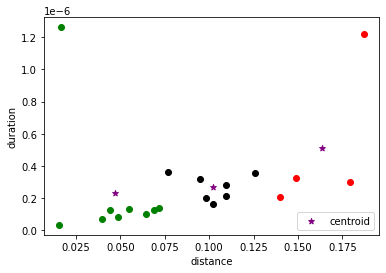

In [107]:
dff1 = dffn[dffn.cluster==0]
dff2 = dffn[dffn.cluster==1]
dff3 = dffn[dffn.cluster==2]
plt.scatter(dff1.distance,dff1['duration'],color='green')
plt.scatter(dff2.distance,dff2['duration'],color='red')
plt.scatter(dff3.distance,dff3['duration'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('distance')
plt.ylabel('duration')
plt.legend()

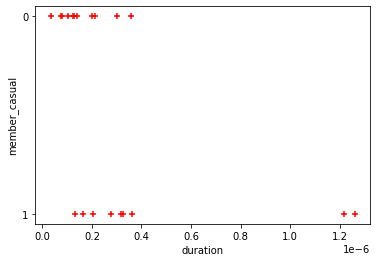

In [108]:
%matplotlib inline
plt.xlabel('duration')
plt.ylabel('member_casual')
plt.scatter(dffn.duration,dffn.member_casual,color='red',marker='+')

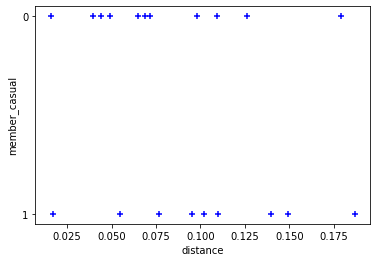

In [109]:
%matplotlib inline
plt.xlabel('distance')
plt.ylabel('member_casual')
plt.scatter(dffn.distance,dffn.member_casual,color='blue',marker='+')